In [94]:
import pandas as pd
import numpy as np
import os
import random

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")
os.chdir("/Users/yj.noh/Documents/GitHub/prj_on_boarding")
print(os.getcwd())
plt.rcParams['font.family'] = 'AppleGothic'

/Users/yj.noh/Documents/GitHub/prj_on_boarding


In [95]:
data = pd.read_csv("/Users/yj.noh/Desktop/on_boarding.csv", encoding = "cp949")
print(data.shape) 
print(data.isna().sum())

(16094, 20)
brms_rider_id               0
birth                       0
delivery_method             0
insurance_type              0
join_date                   0
first_available_date        0
business_start_day          0
is_recom                    0
gender                      0
active_days                 0
avg_daily_delivery          0
avg_distance                0
avg_fee                     0
avg_distance_1_to_3         0
avg_fee_1_to_3              0
last_working_day            0
join_period                 0
from_join_to_first_able     0
from_first_able_to_start    0
outcome                     0
dtype: int64


## 친구추천 아닌 사람만

In [96]:
data_is_not_recom = data[data['is_recom'] == 0]
print(data_is_not_recom.shape) #10,215 
print(data_is_not_recom['is_recom'].value_counts())

(10215, 20)
is_recom
0    10215
Name: count, dtype: int64


In [97]:
print(data_is_not_recom['delivery_method'].value_counts())

delivery_method
BIKE                 4239
PAS_BICYCLES         1666
CAR                  1616
GENERAL_BICYCLES      931
WALK                  883
THROTTLE_BICYCLES     642
KICKBOARD             238
Name: count, dtype: int64


## 수단별 EDA 

In [98]:
category_vars = ['birth', 'delivery_method', 'insurance_type', 'is_recom', 'gender']
num_vars = ['active_days', 'avg_daily_delivery', 'avg_distance', 'avg_fee', 'avg_distance_1_to_3', 'avg_fee_1_to_3', 'join_period', 'from_join_to_first_able', 'from_first_able_to_start']
delivery_method = ['BIKE', 'PAS_BICYCLES', 'CAR', 'GENERAL_BICYCLES', 'WALK','THROTTLE_BICYCLES', 'KICKBOARD']

In [99]:
def plot_numeric(data, numeric_vars, outcome, delivery_methods):
    palette = 'coolwarm'

    for method in delivery_methods:
        
        os.makedirs(f'graph/{method}', exist_ok=True)
        method_data = data[data['delivery_method'] == method]

        for num_var in numeric_vars:
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            fig.suptitle(f'{method} - {num_var} 분포', fontsize=12)

            # Boxplot
            sns.boxplot(ax=axs[0], x=outcome, y=num_var, data=method_data, palette=palette)
            axs[0].set_title('Boxplot')

            # Violinplot
            sns.violinplot(ax=axs[1], x=outcome, y=num_var, data=method_data, palette=palette)
            axs[1].set_title('Violinplot')

            # KDE plot
            sns.kdeplot(ax=axs[2], data=method_data, x=num_var, hue=outcome, fill=True, common_norm=False, palette=palette, alpha=.5, linewidth=0)
            axs[2].set_title('Density plot')

            plt.tight_layout()
            fig.subplots_adjust(top=0.85)

            # 각 method별 폴더에 그래프 저장
            fig.savefig(f'graph/{method}/{method}_{num_var}_분포.png')
            plt.show()
            plt.close(fig)

In [100]:
def plot_category(data, category_vars, outcome, delivery_methods):
    palette = 'coolwarm'

    for method in delivery_methods:
      
        os.makedirs(f'graph/{method}', exist_ok=True)
        method_data = data[data['delivery_method'] == method]
        method_data[outcome] = method_data[outcome].replace({0: '미이탈', 1: '이탈'})

        for cat_var in category_vars:
            plt.figure(figsize=(12, 4))
            ax = sns.countplot(x=cat_var, hue=outcome, data=method_data, palette=palette)
            plt.title(f'{method} - 이탈여부에 따른 {cat_var} 분포')
            plt.ylabel('개수')
            plt.legend(title=outcome, loc='upper right')
            plt.xticks(fontsize=8)

            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

            plt.tight_layout()
            plt.savefig(f'graph/{method}/{method}_{cat_var}_분포.png')
            plt.show()


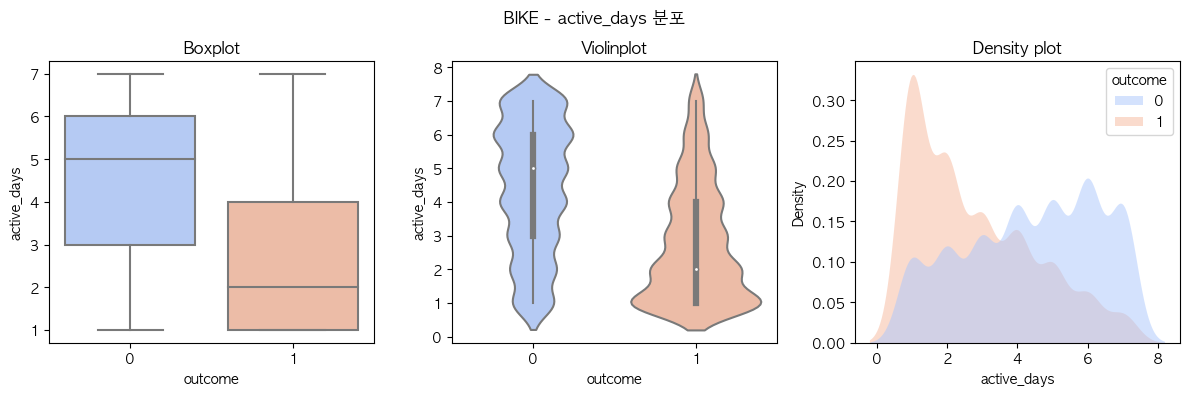

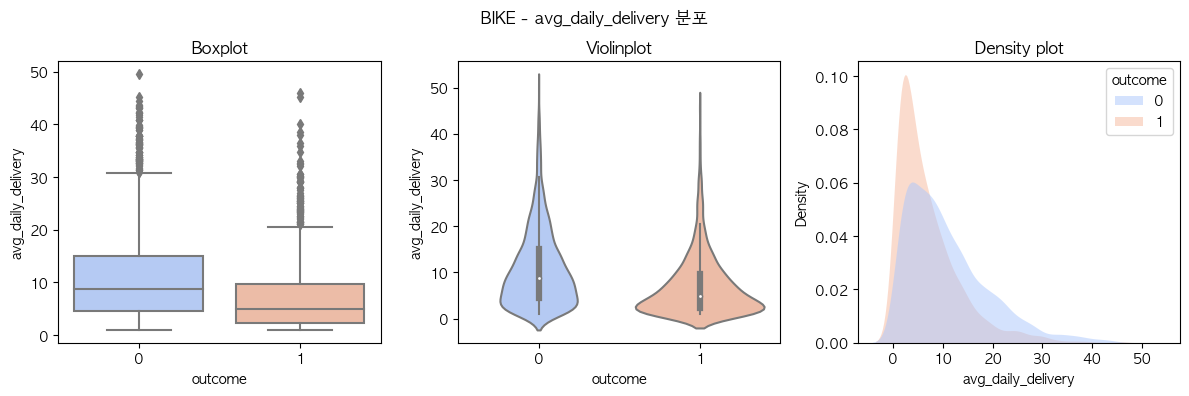

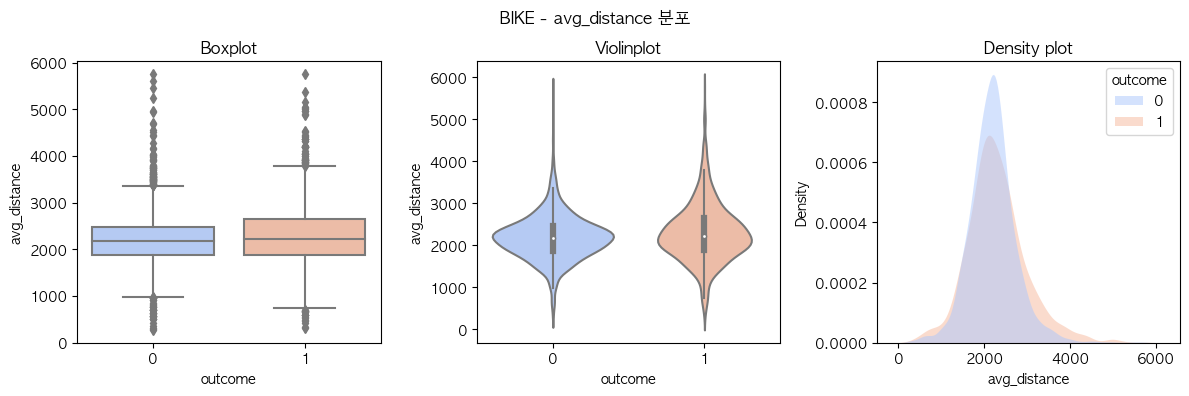

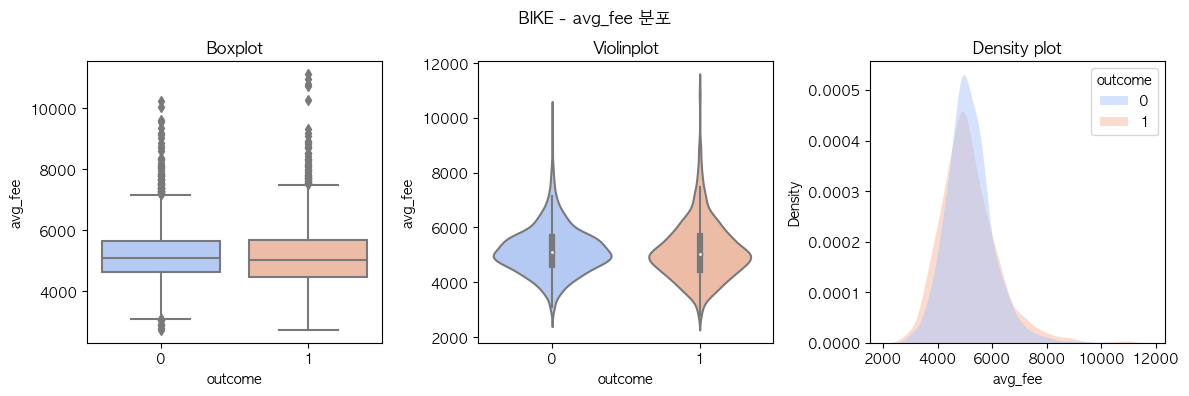

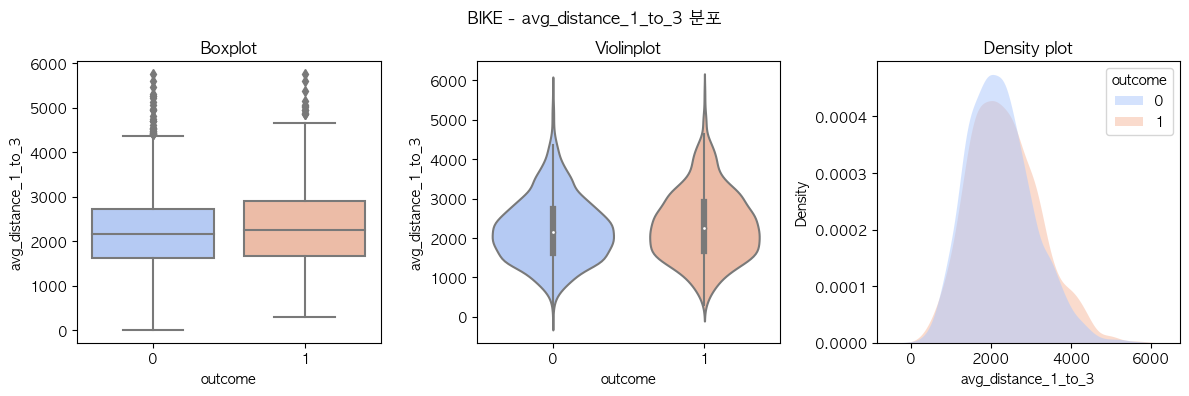

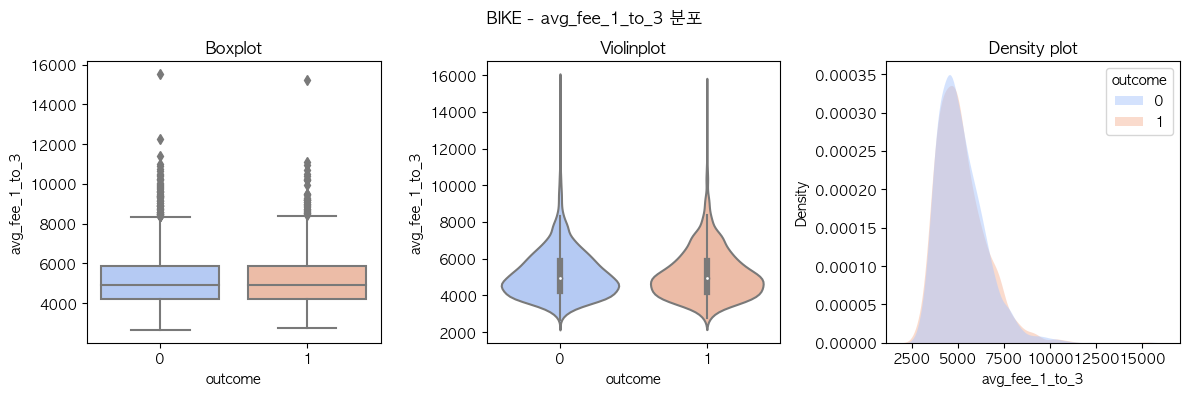

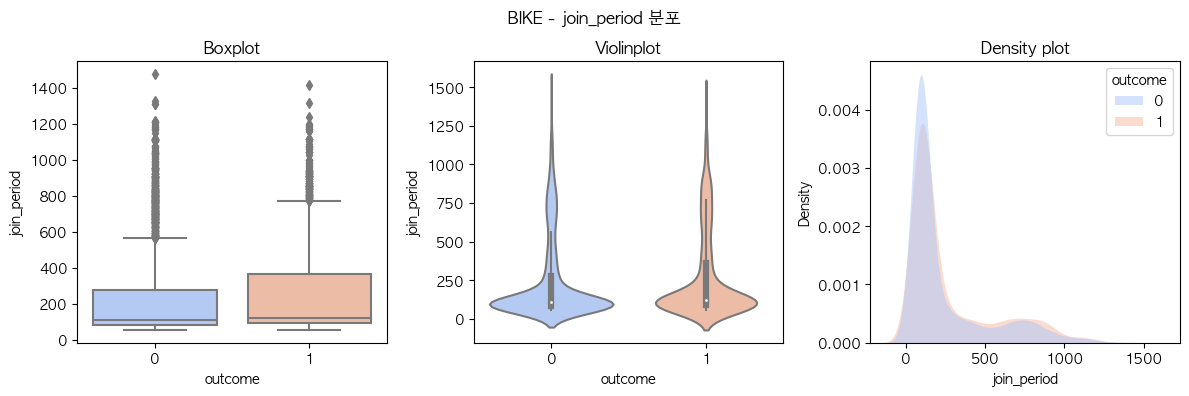

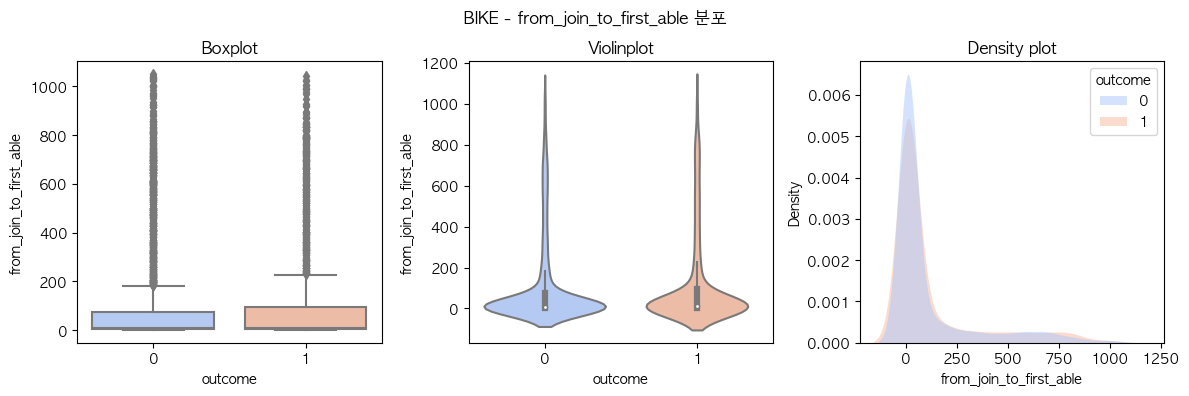

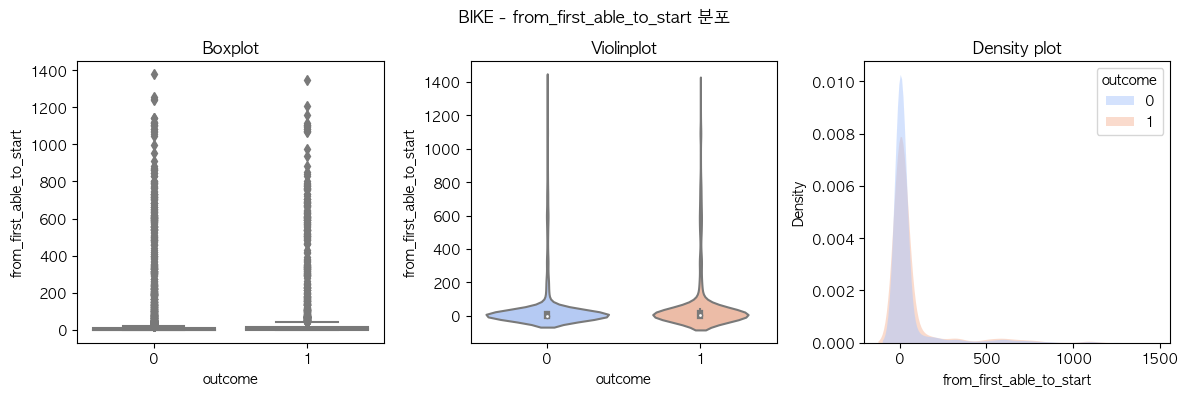

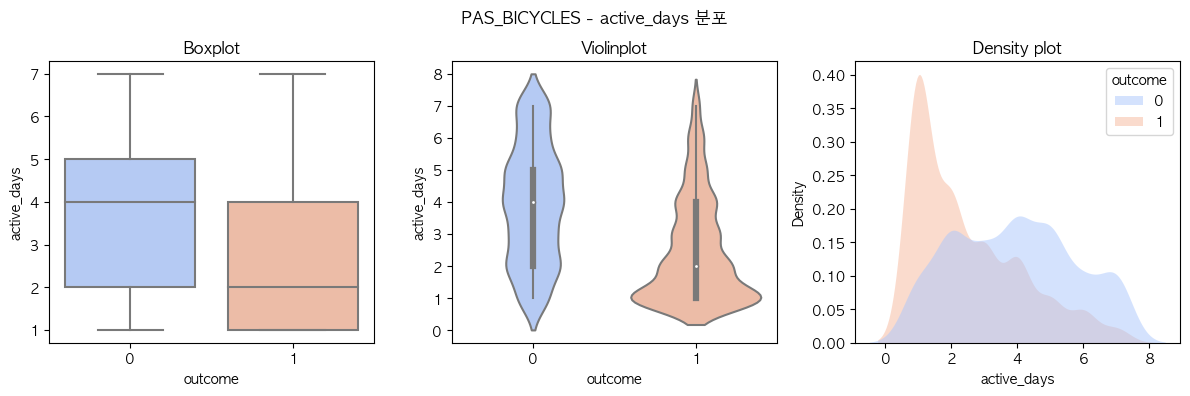

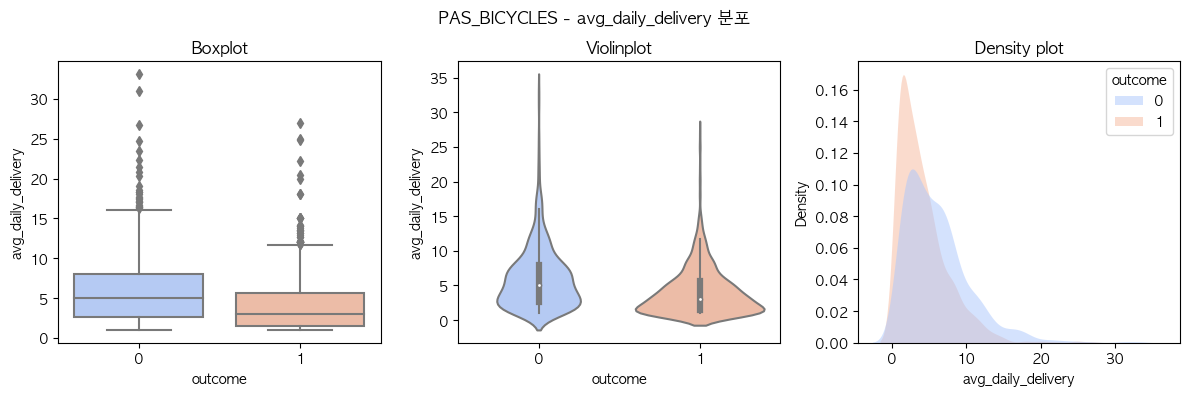

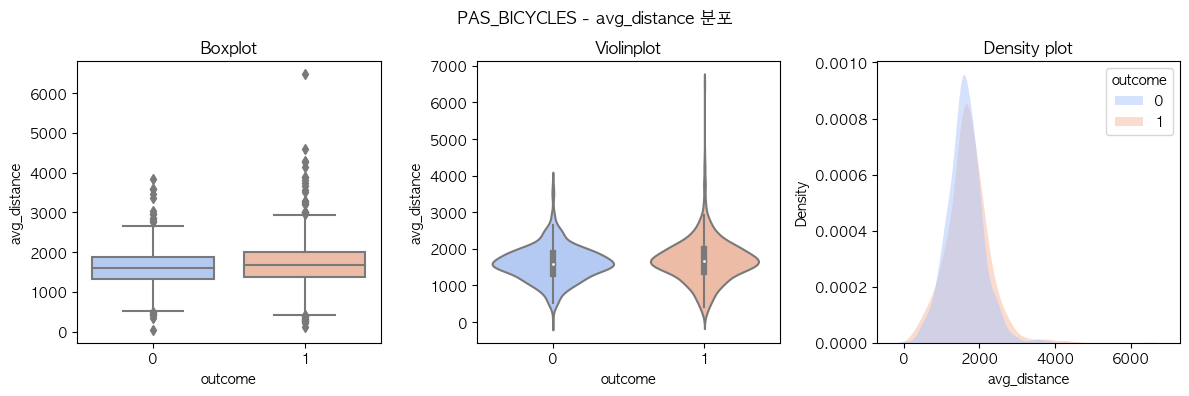

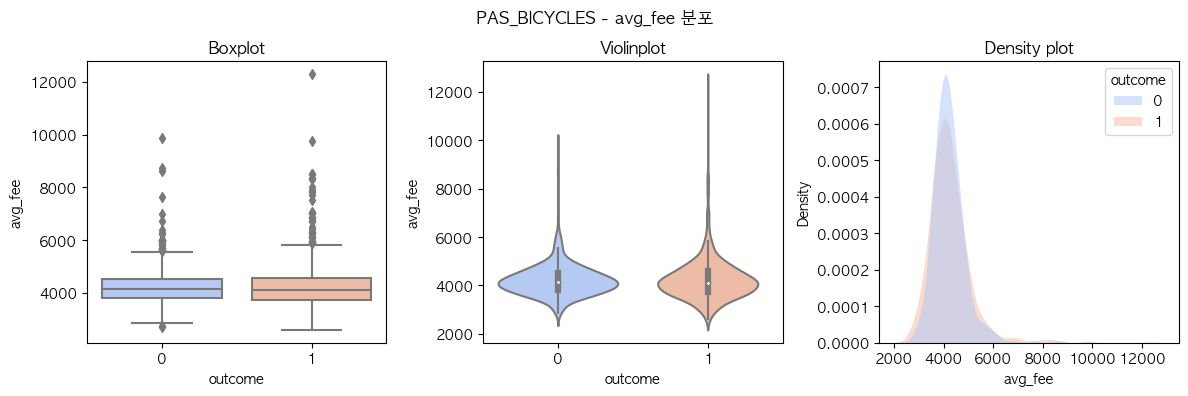

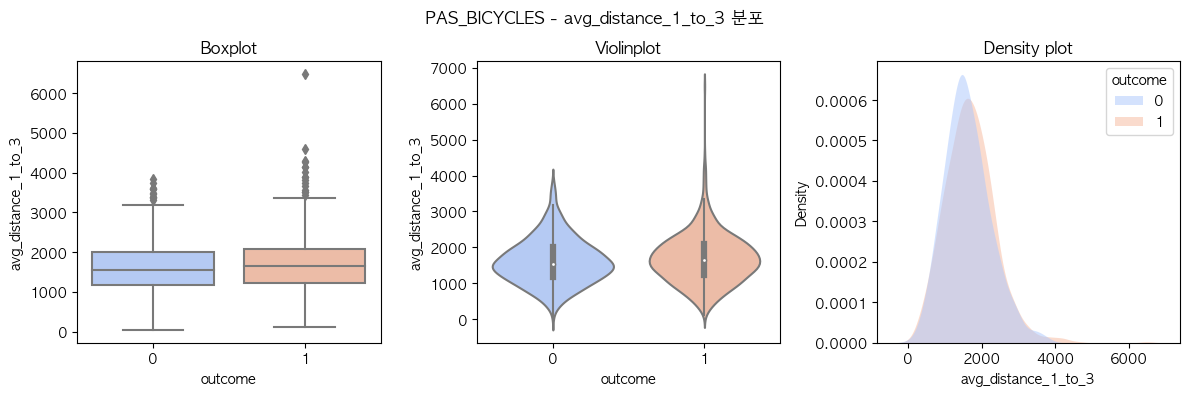

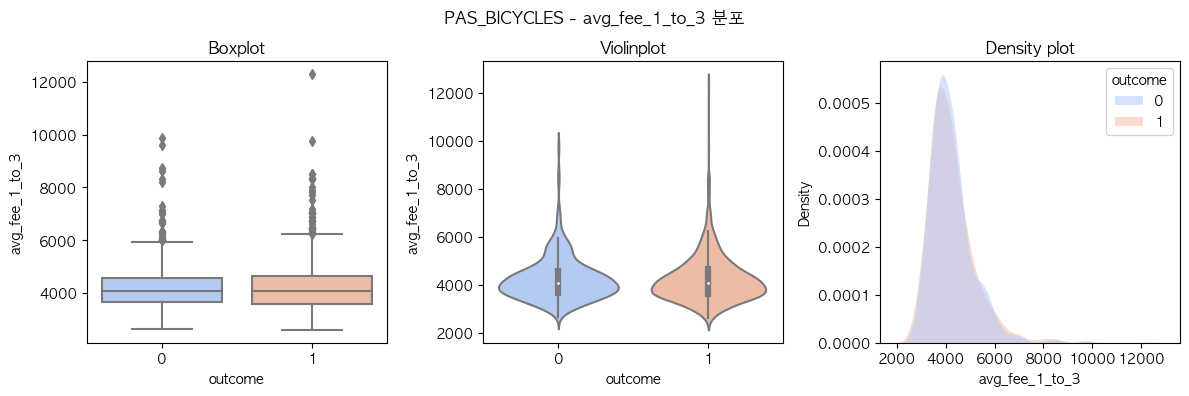

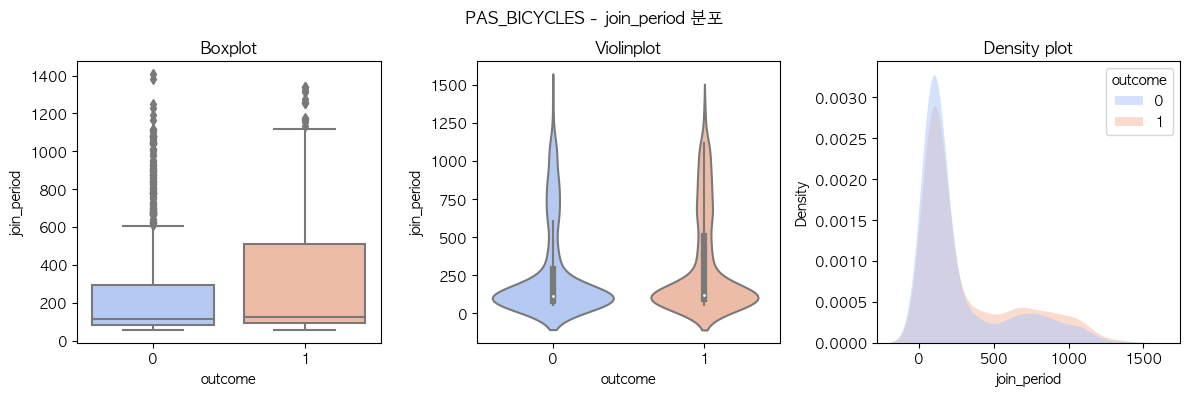

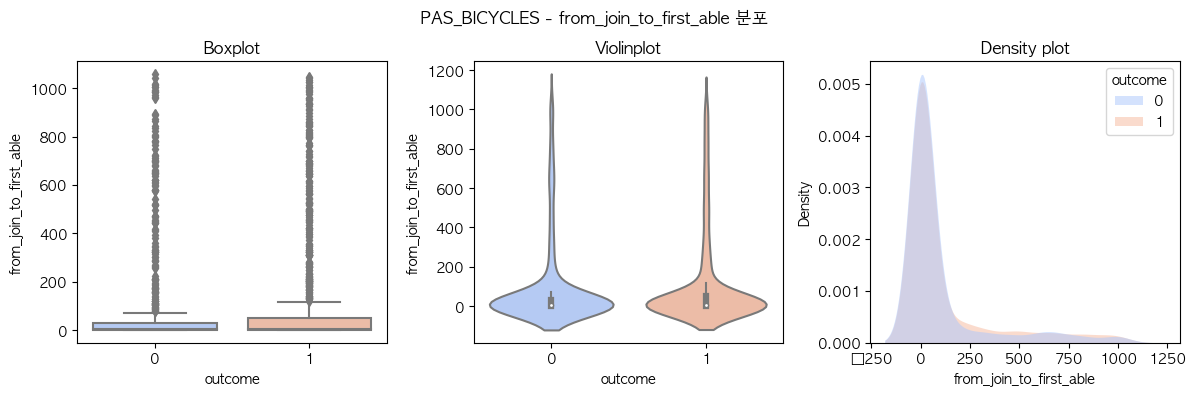

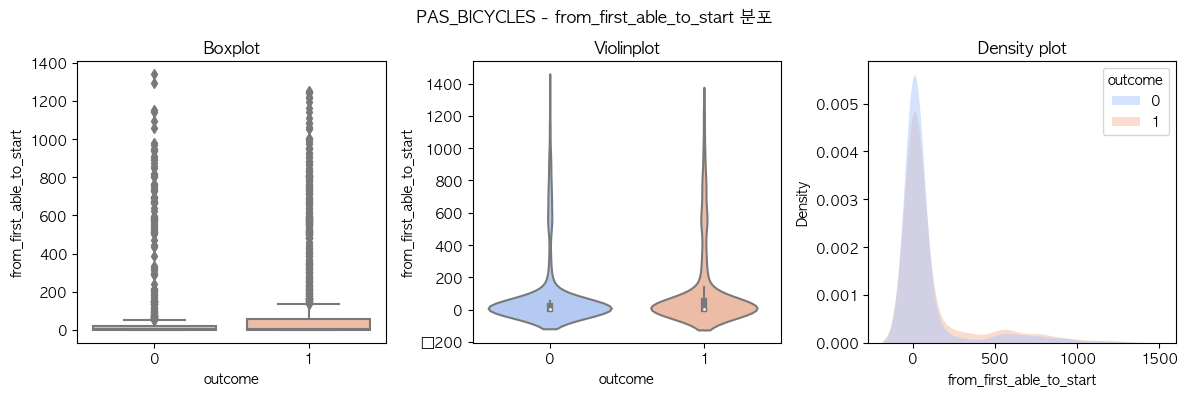

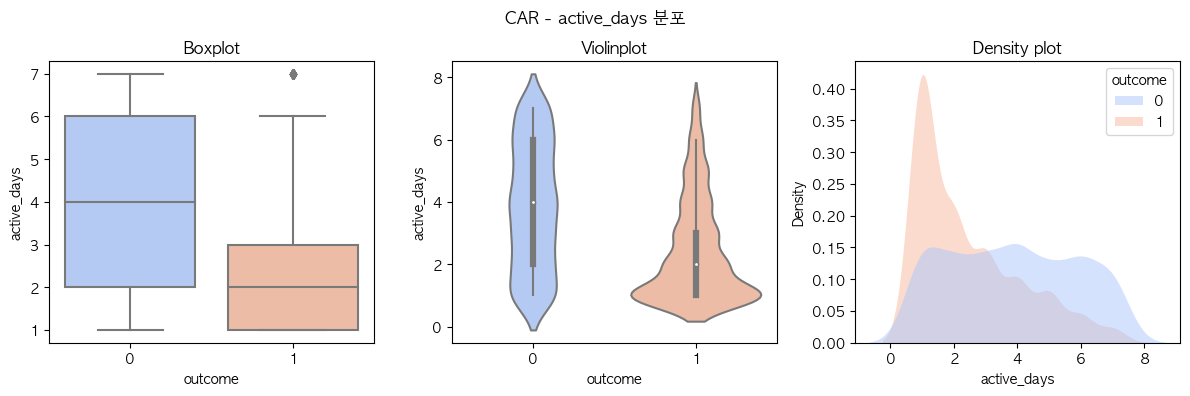

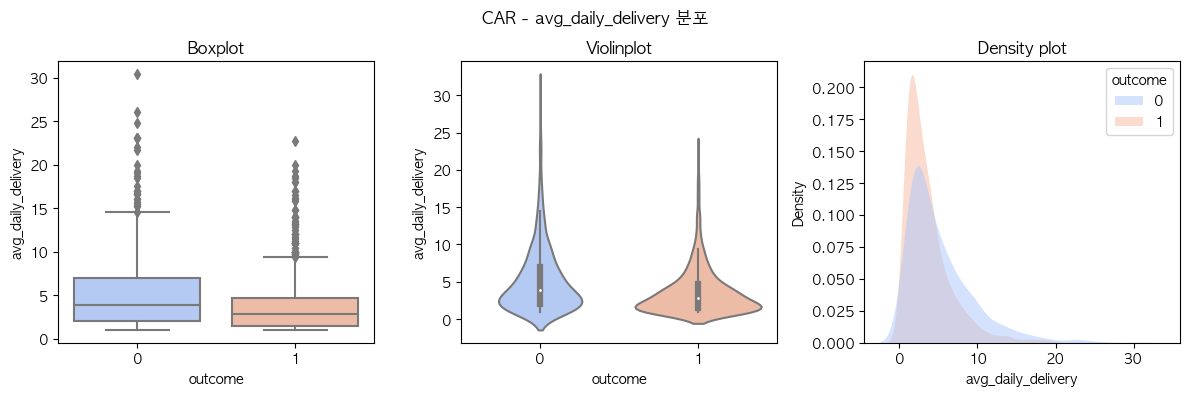

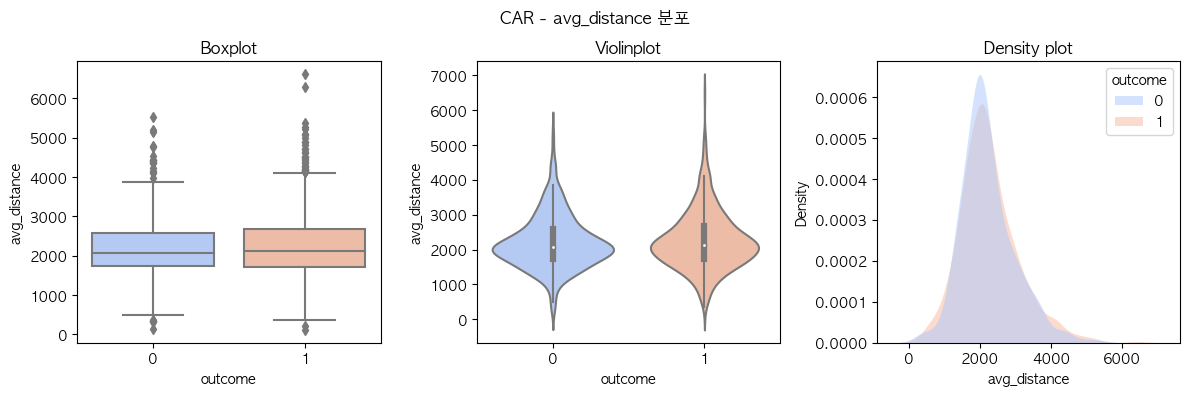

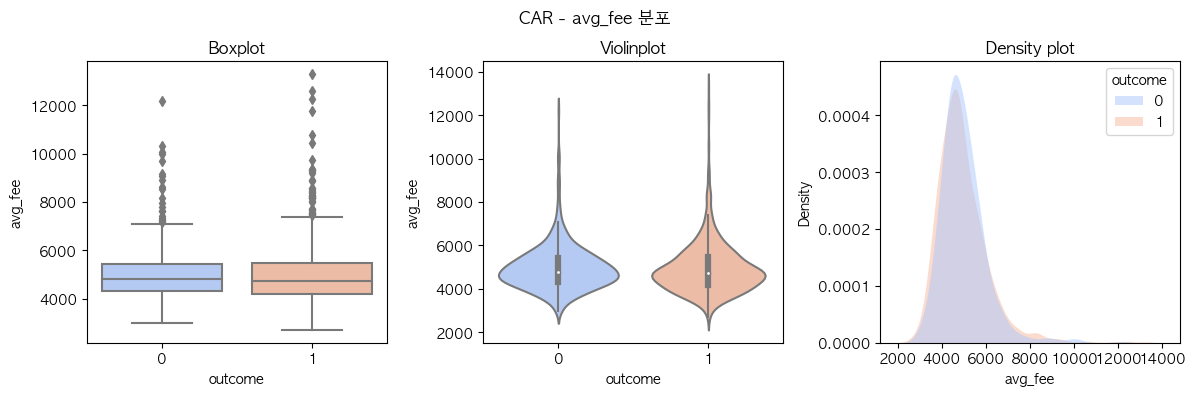

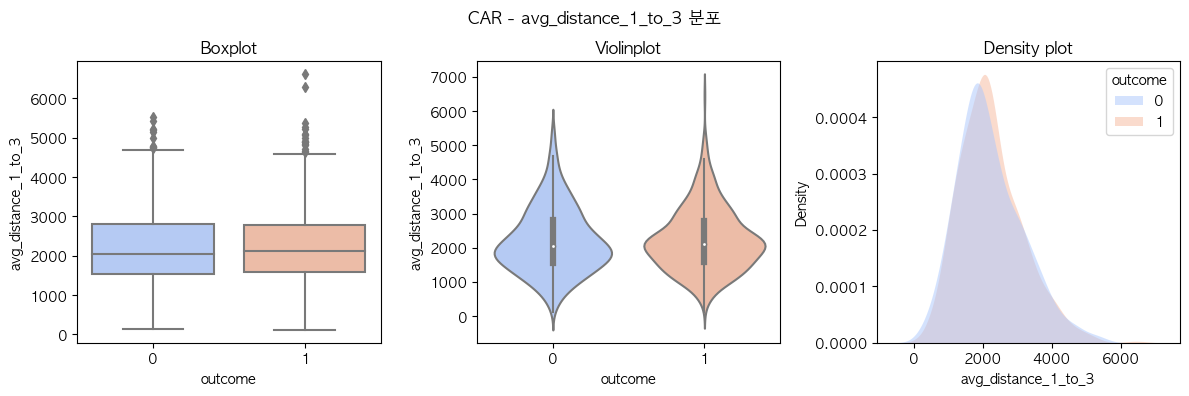

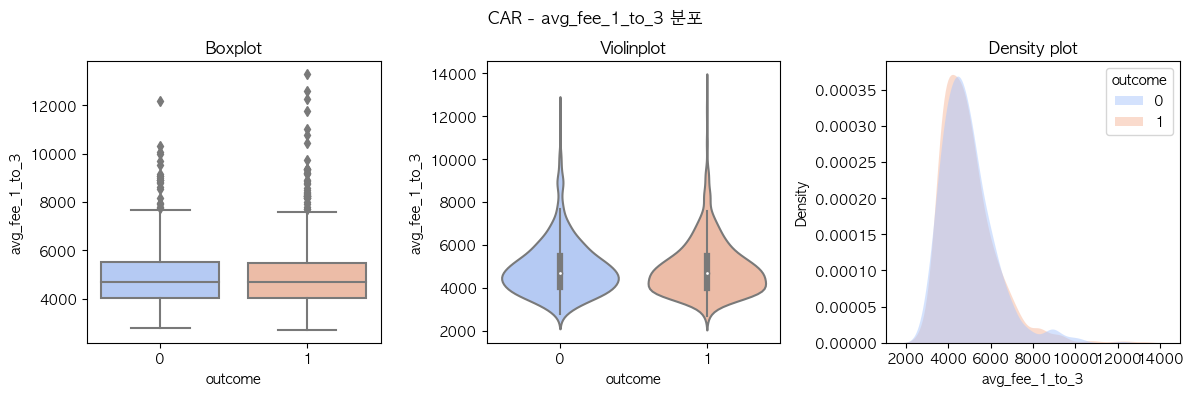

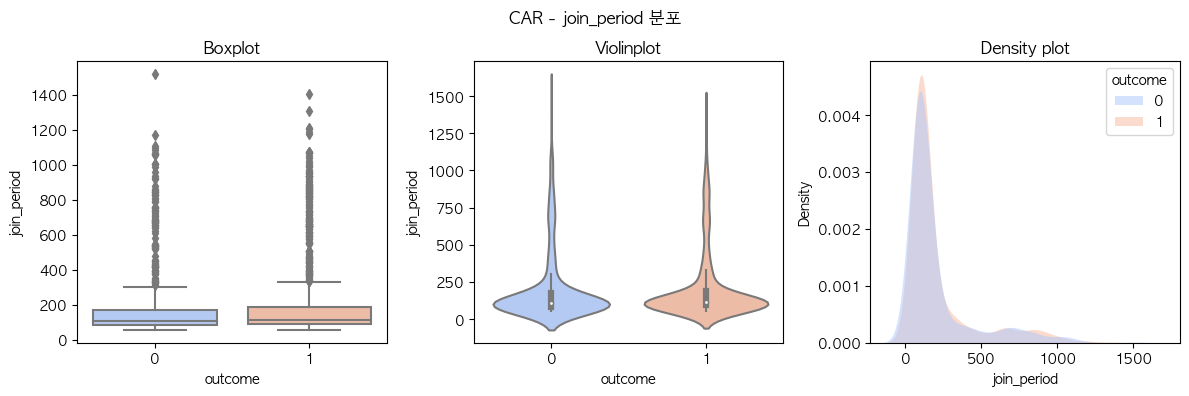

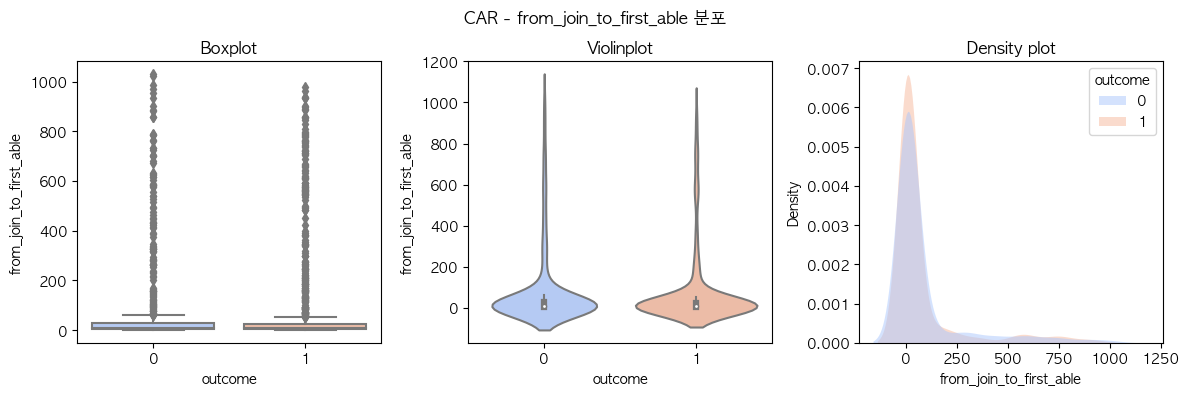

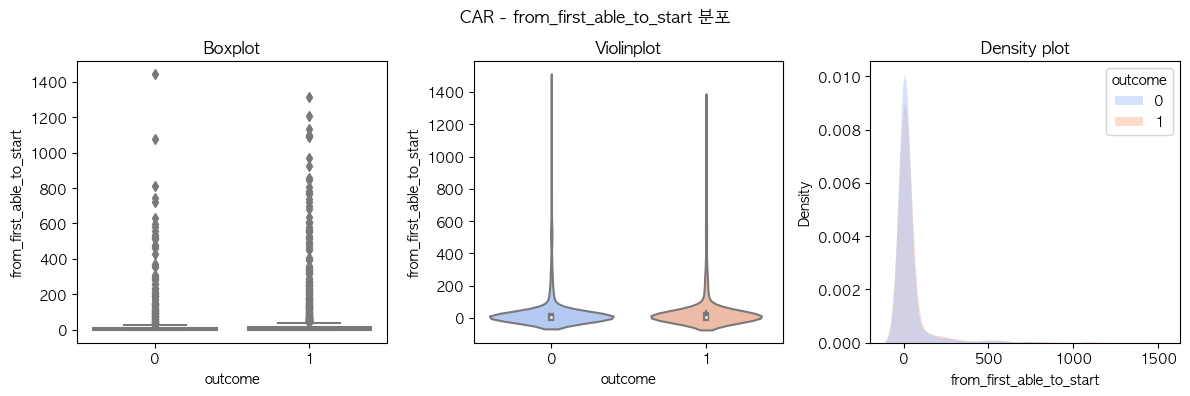

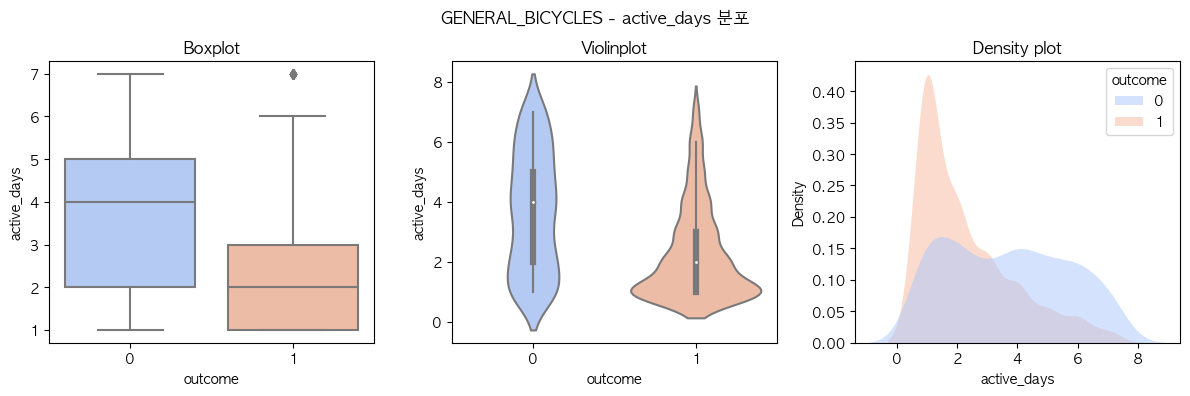

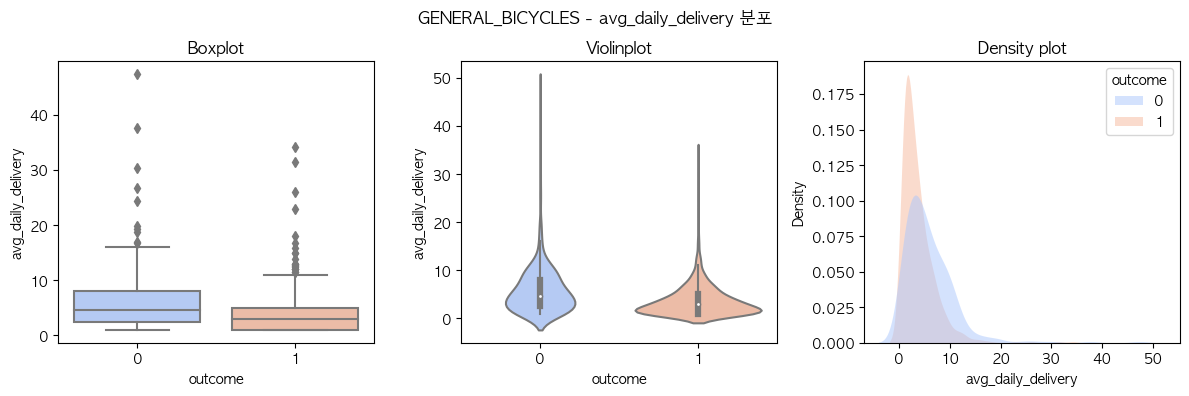

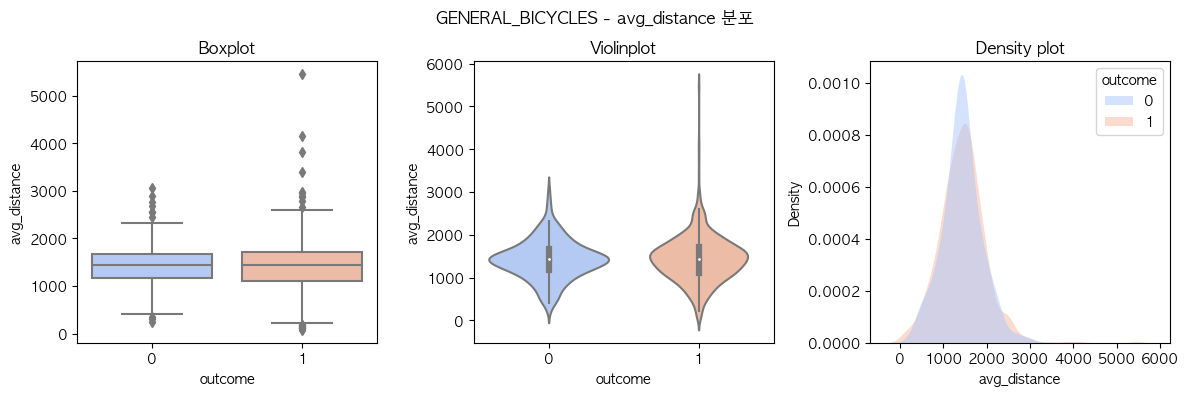

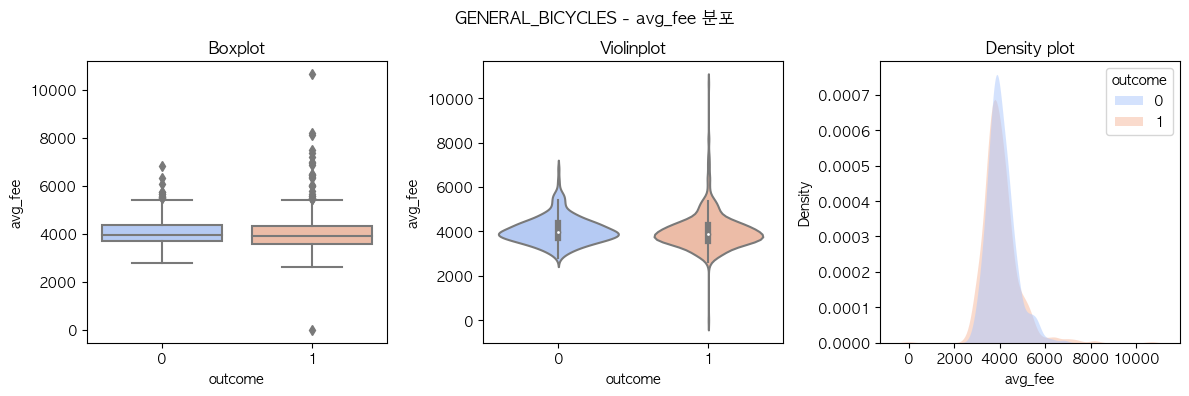

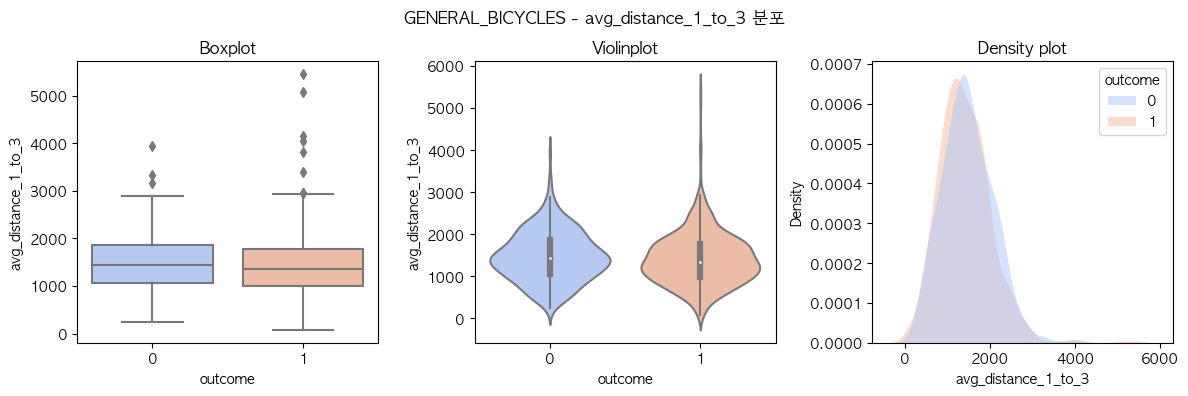

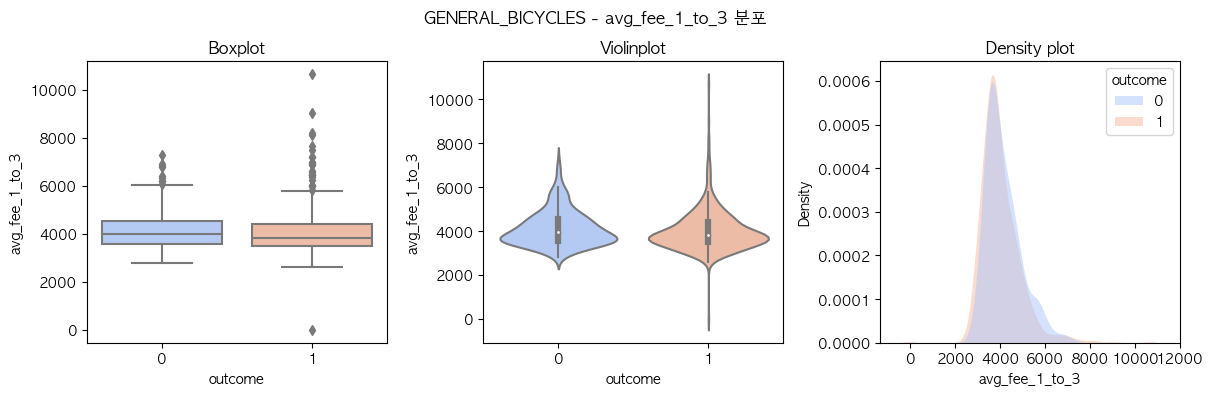

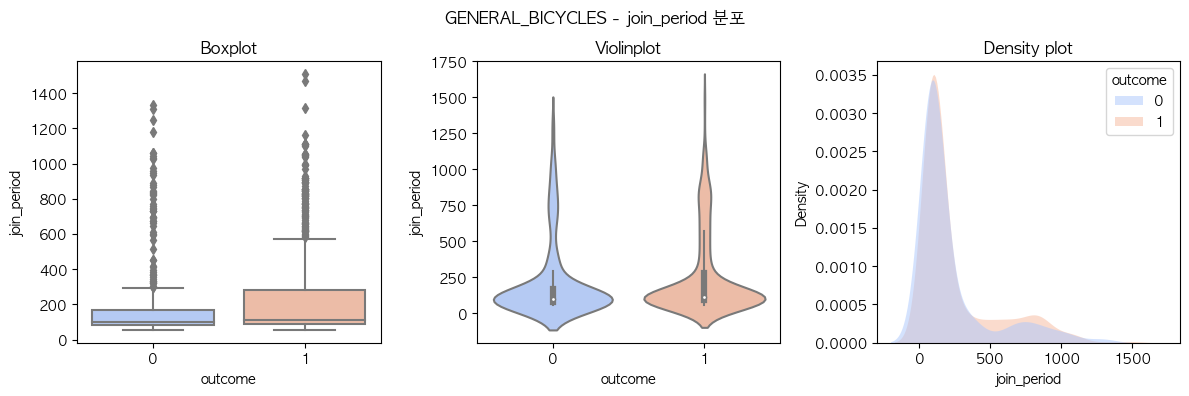

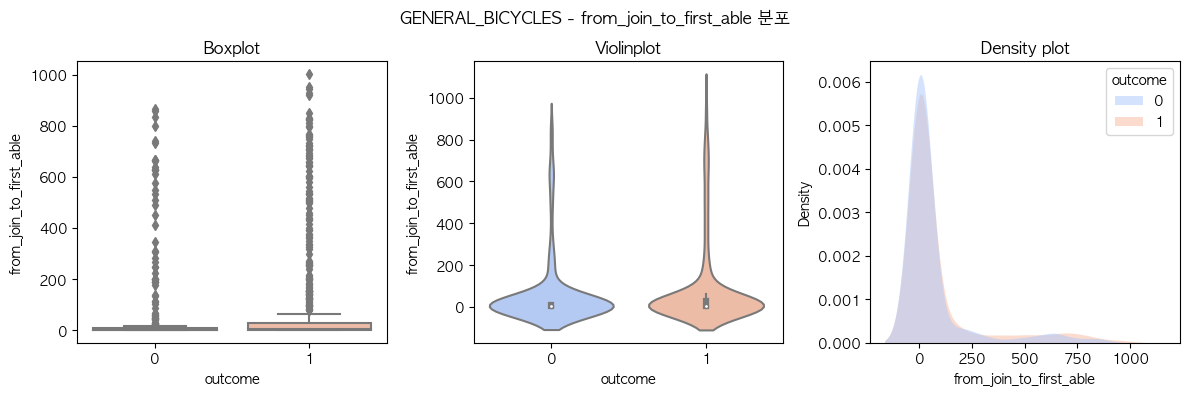

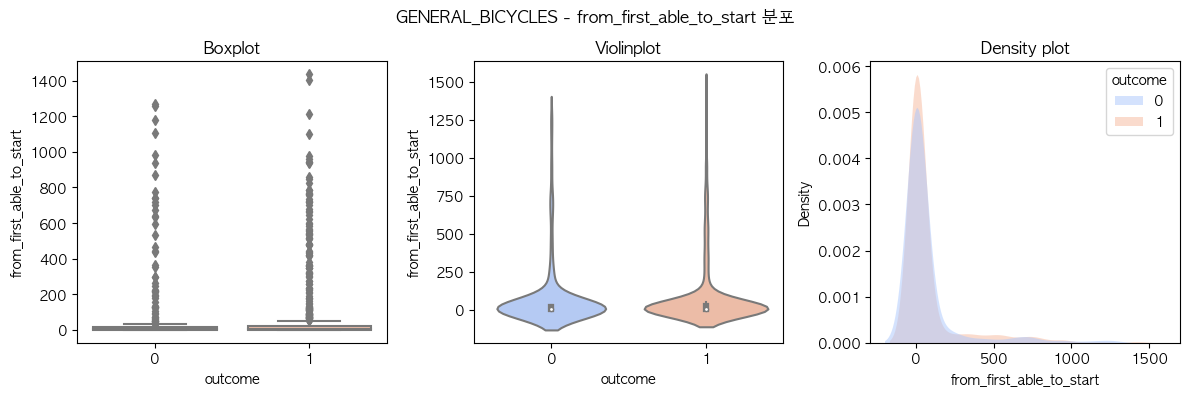

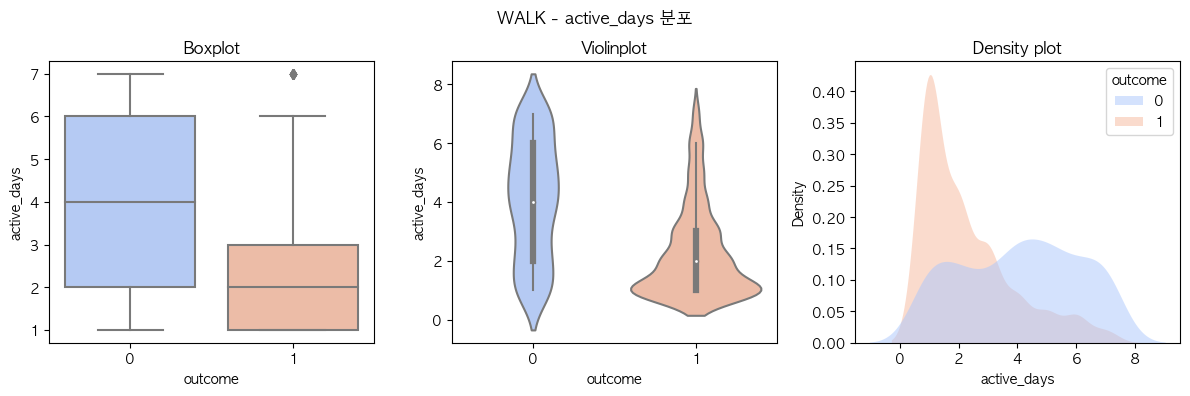

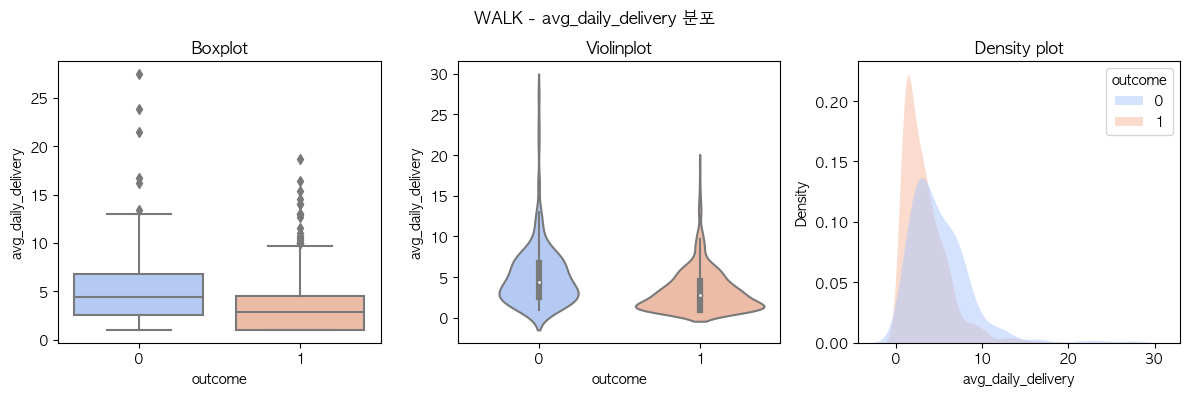

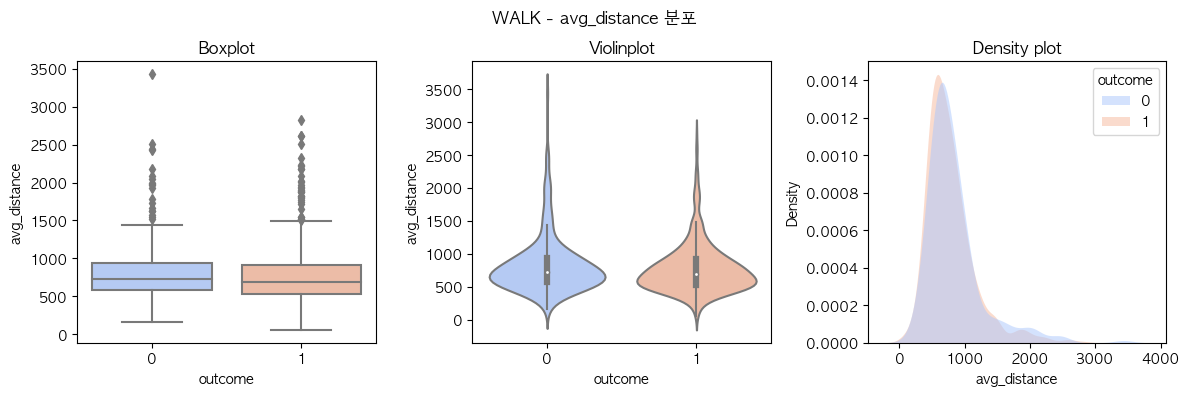

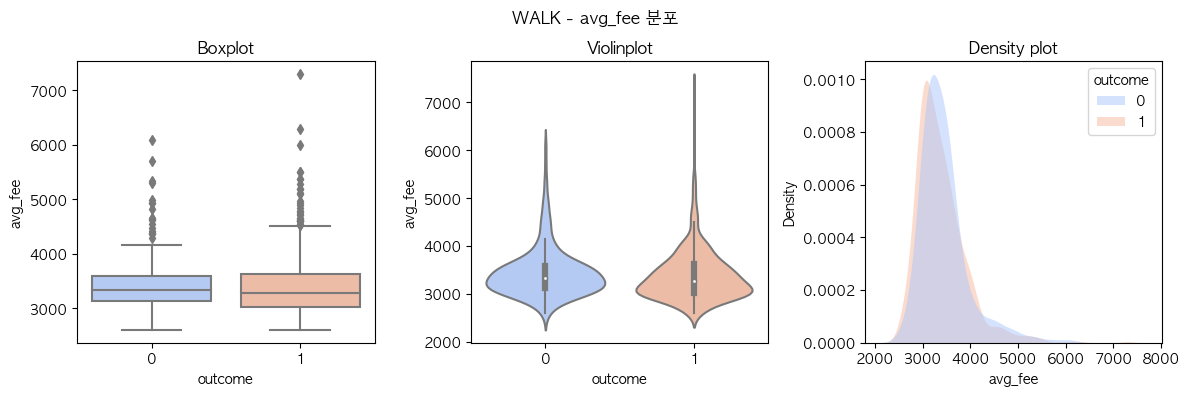

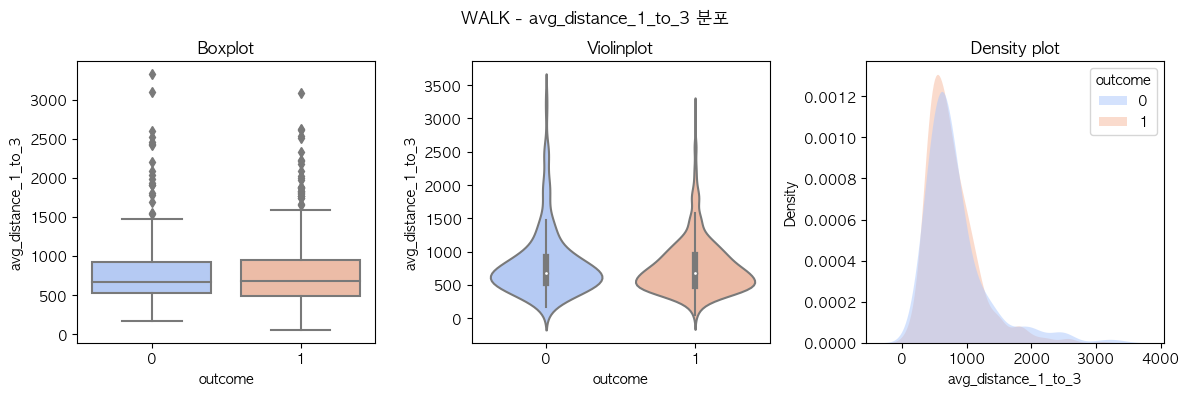

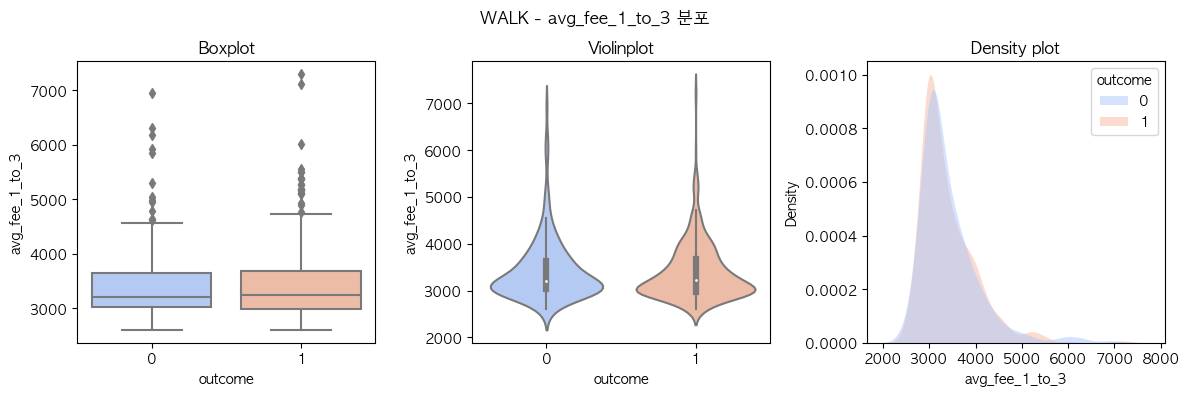

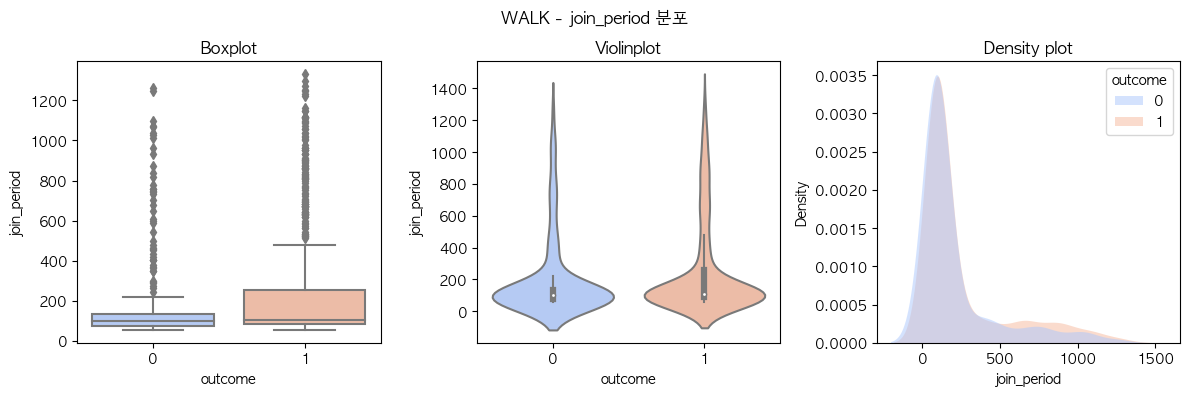

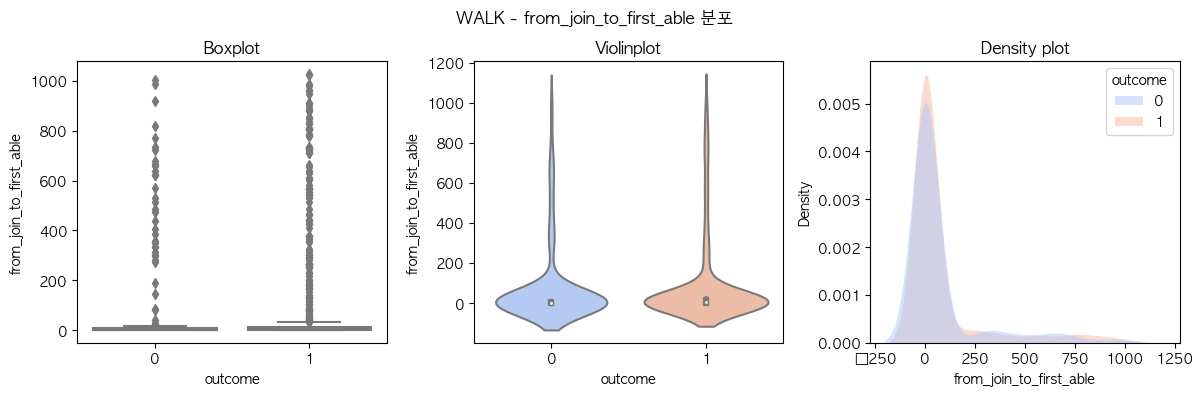

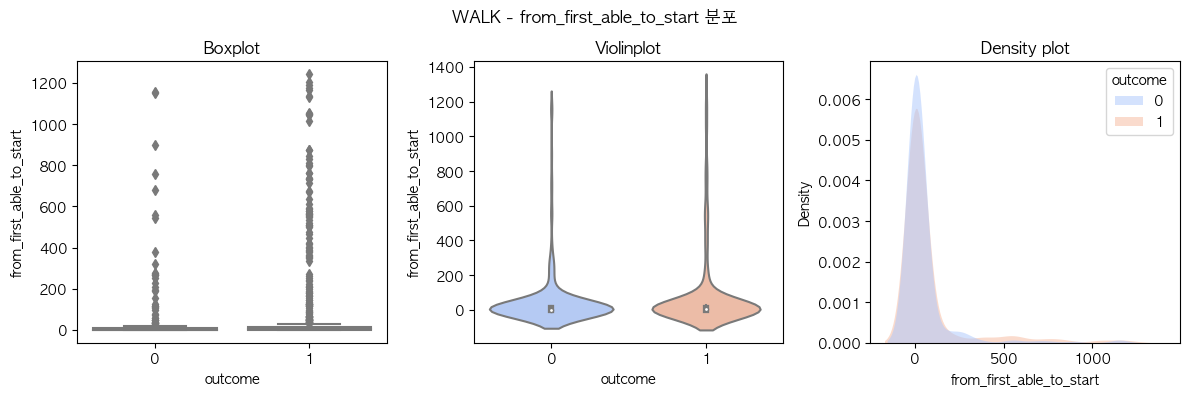

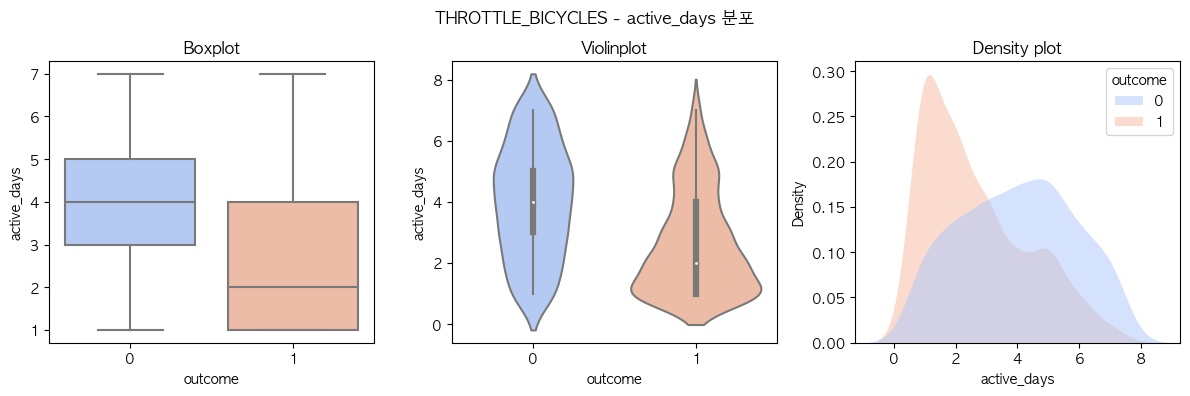

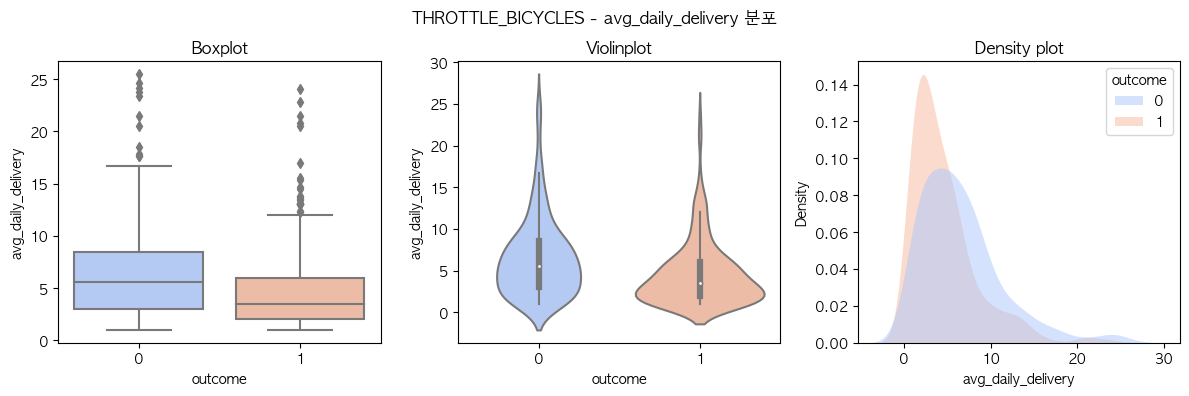

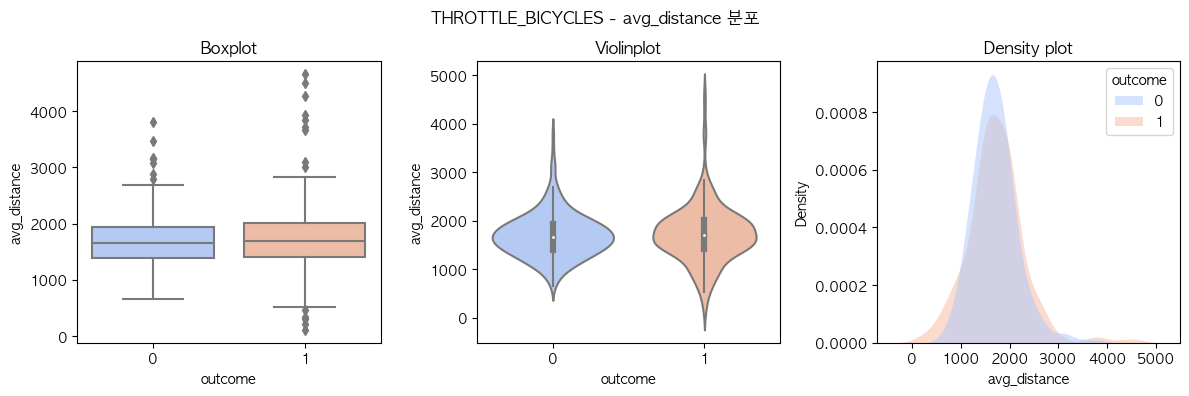

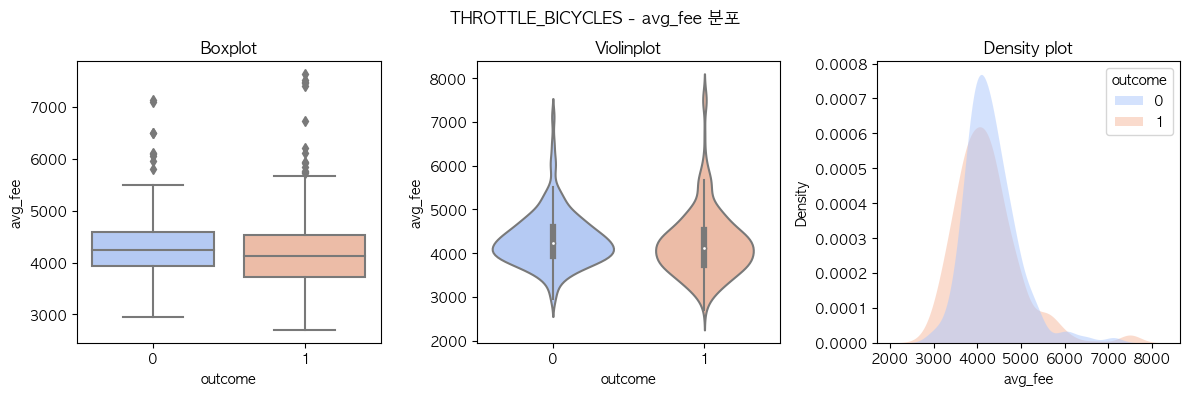

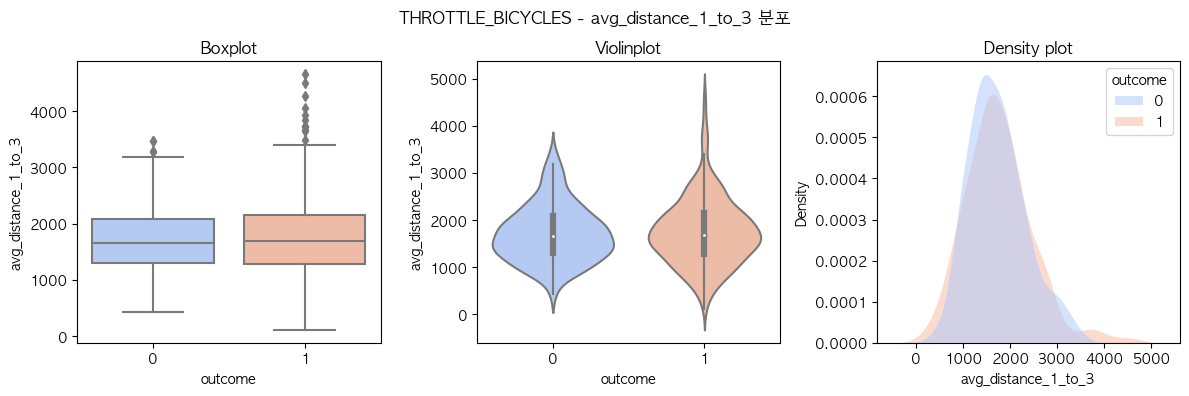

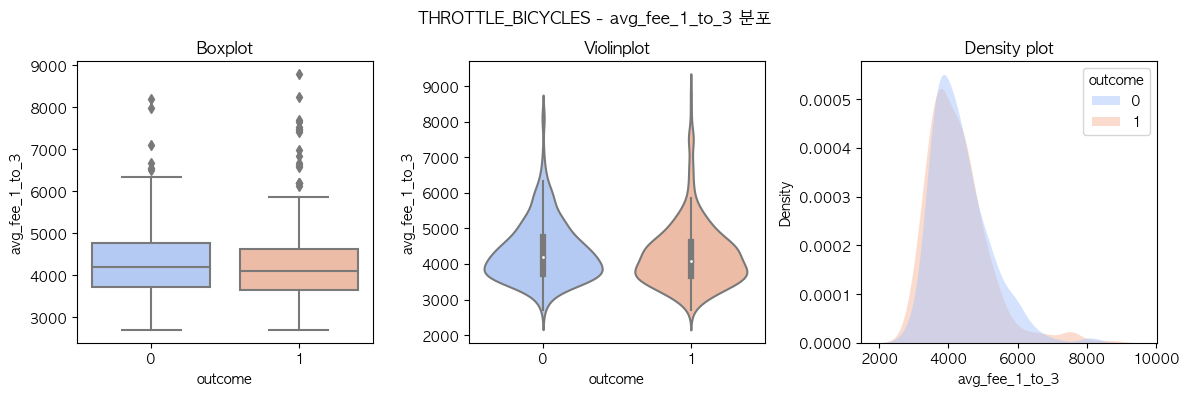

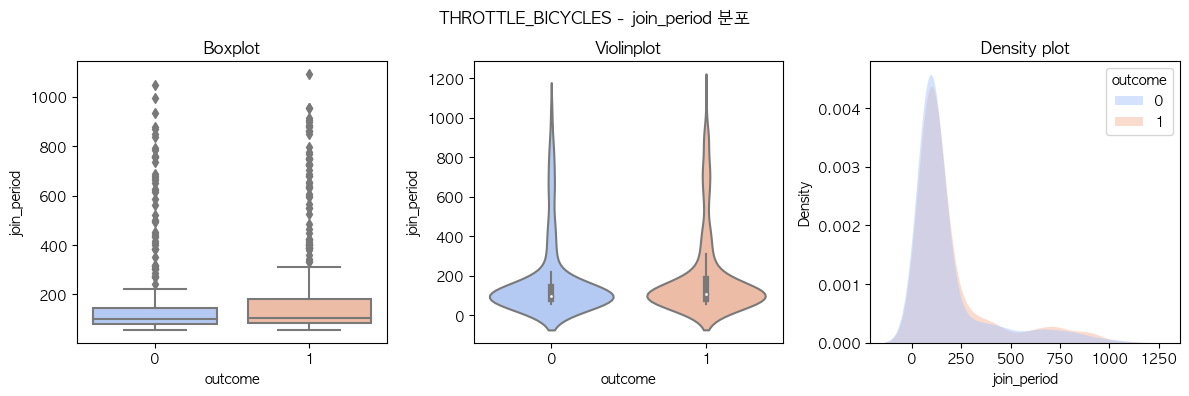

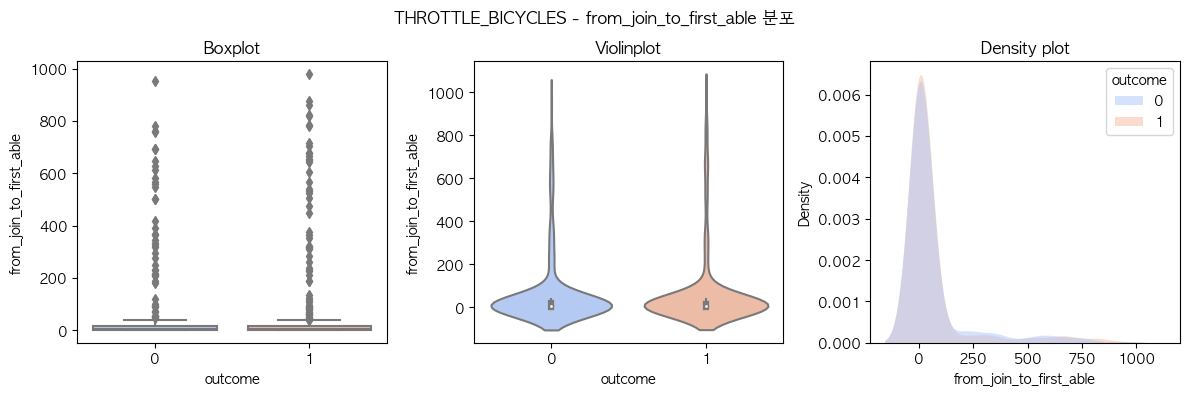

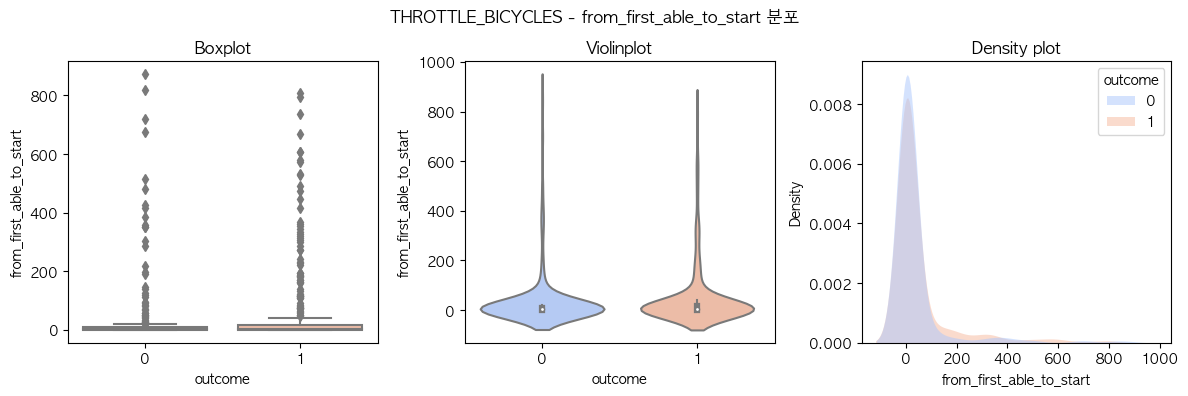

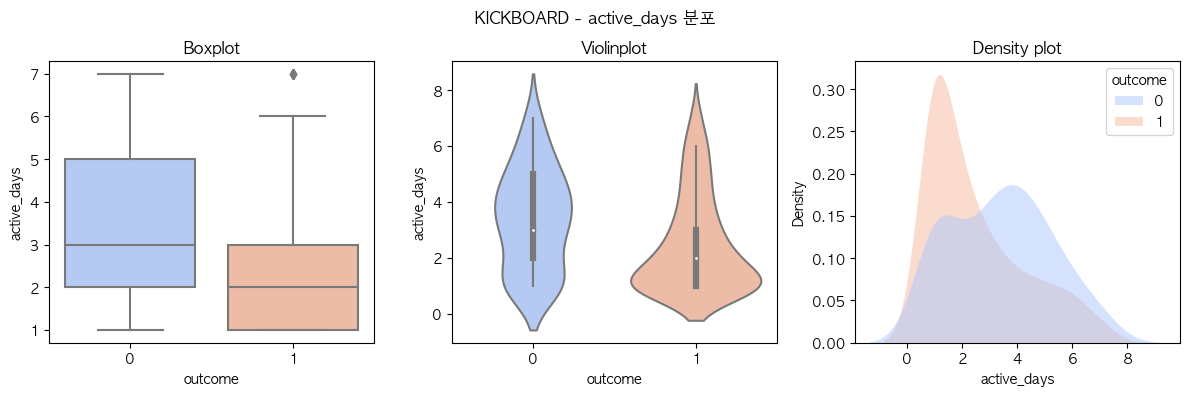

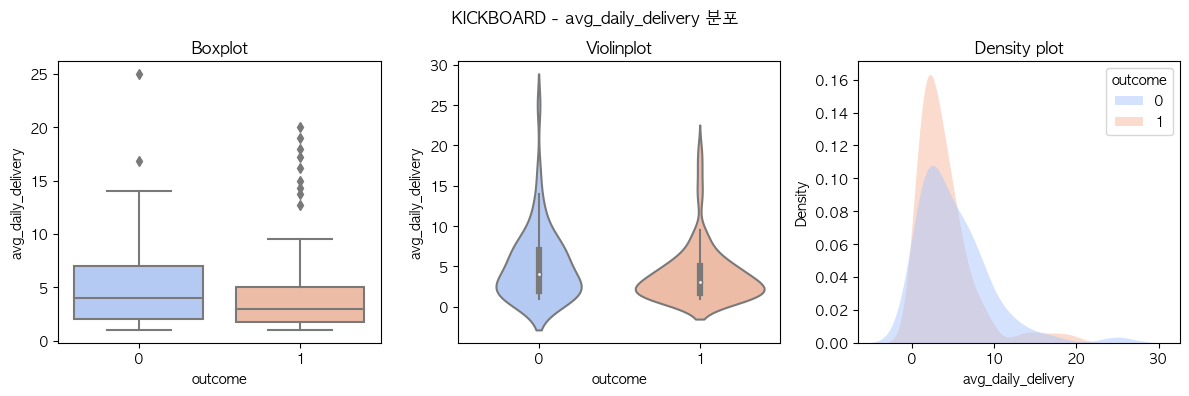

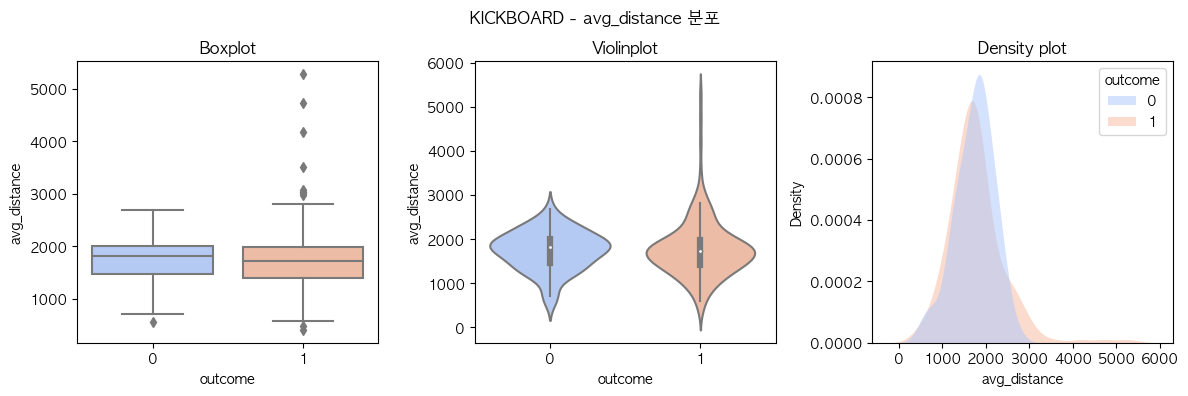

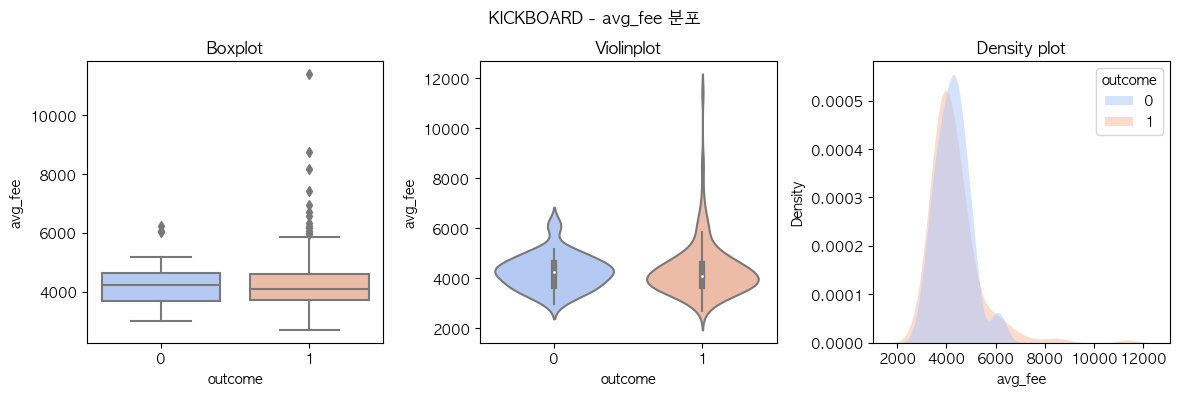

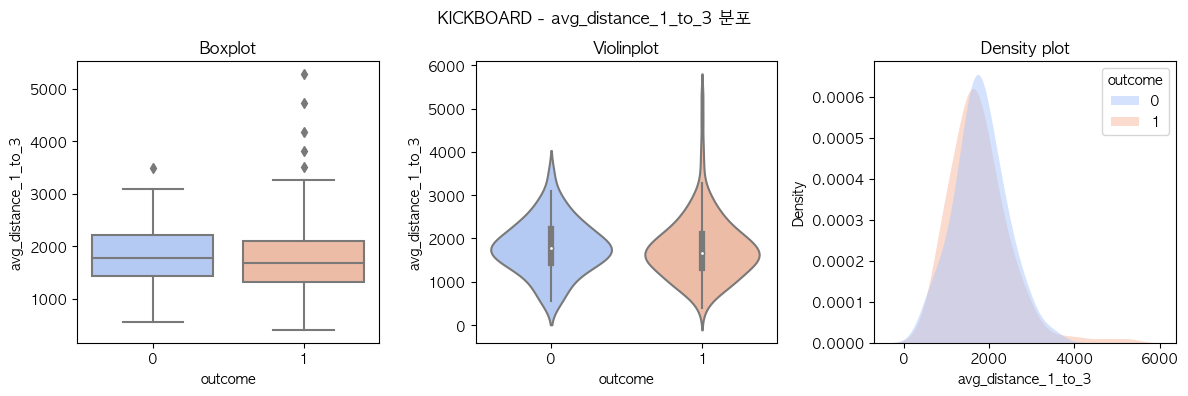

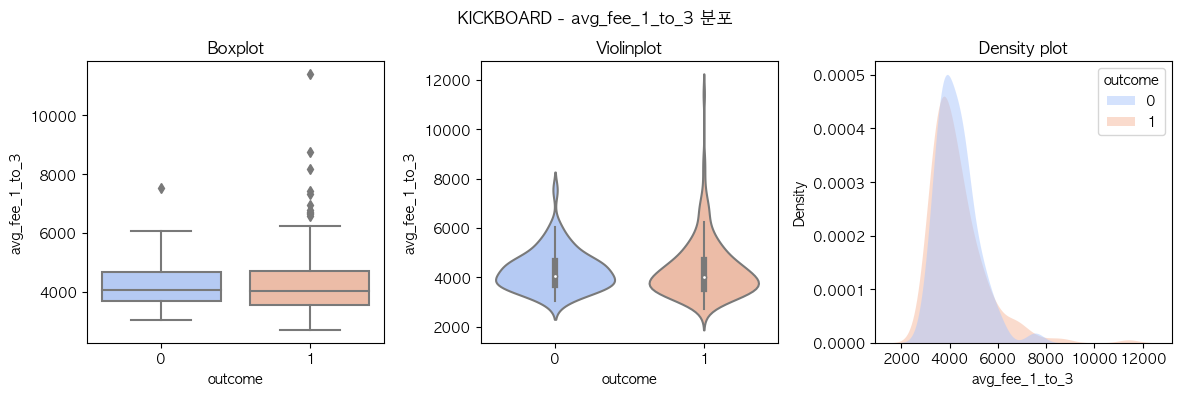

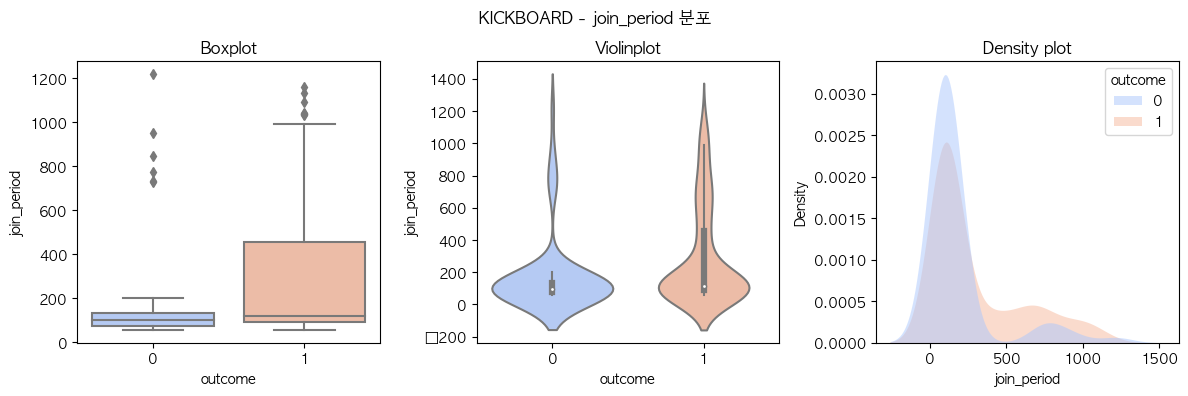

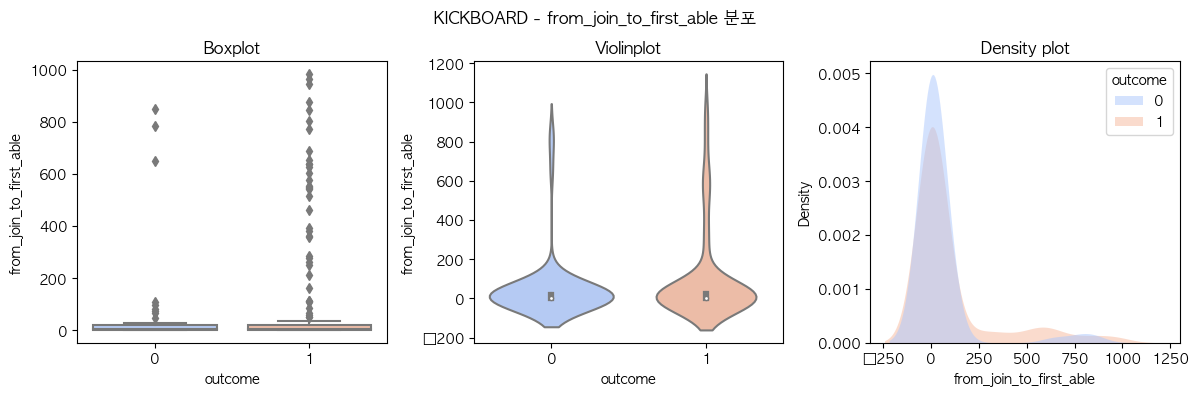

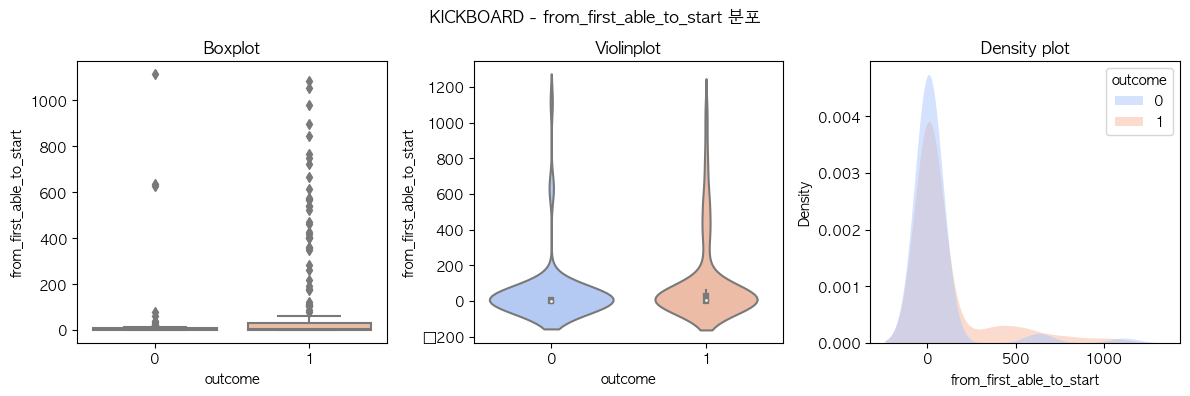

In [101]:
plot_numeric(data_is_not_recom, num_vars, 'outcome', delivery_method)

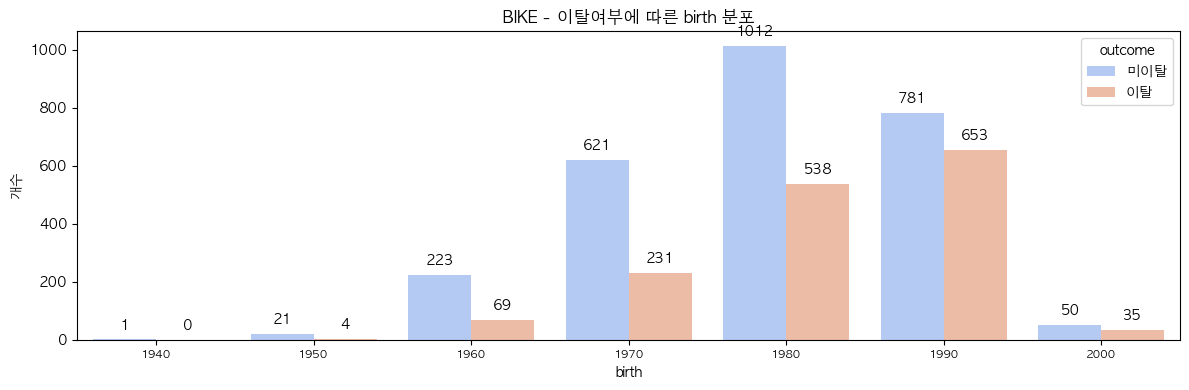

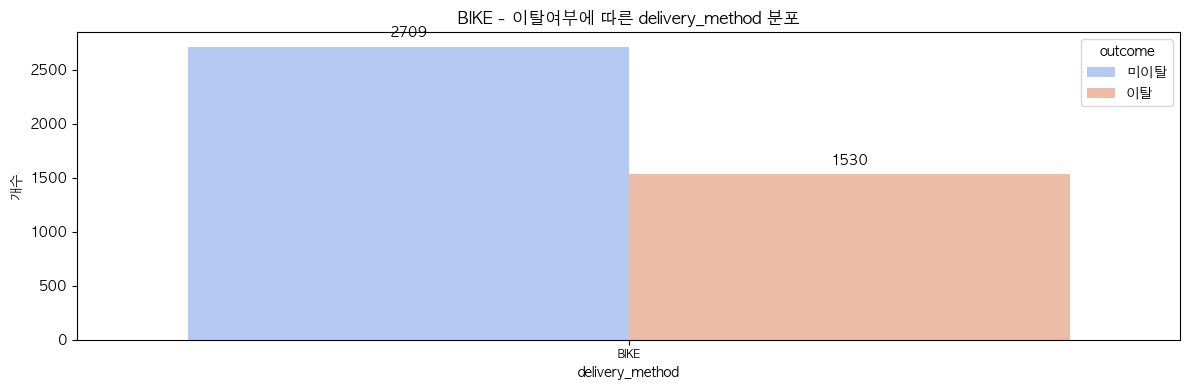

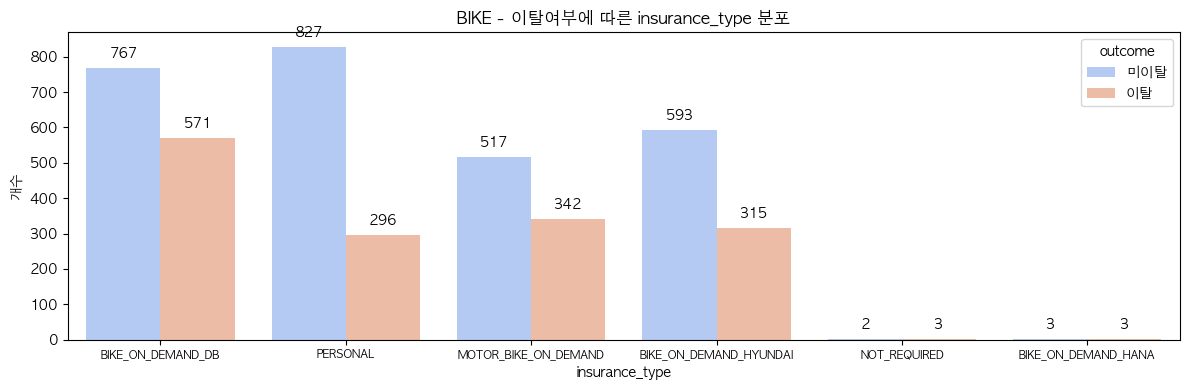

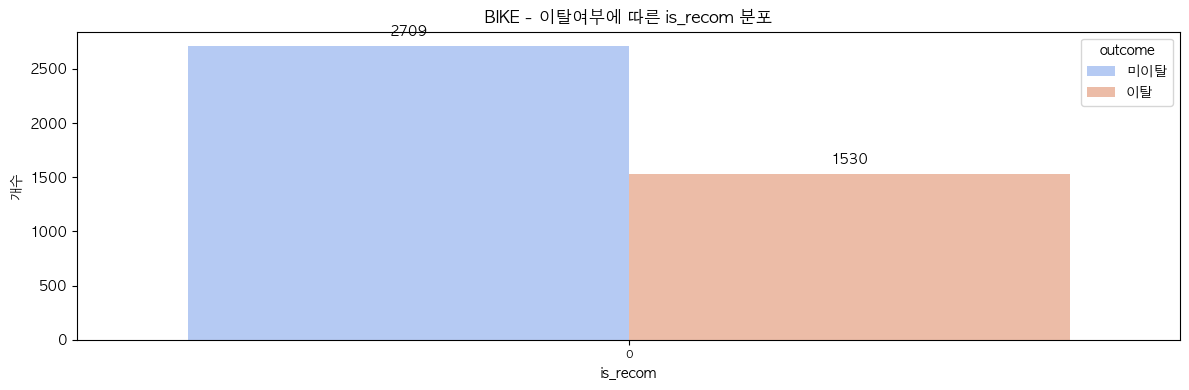

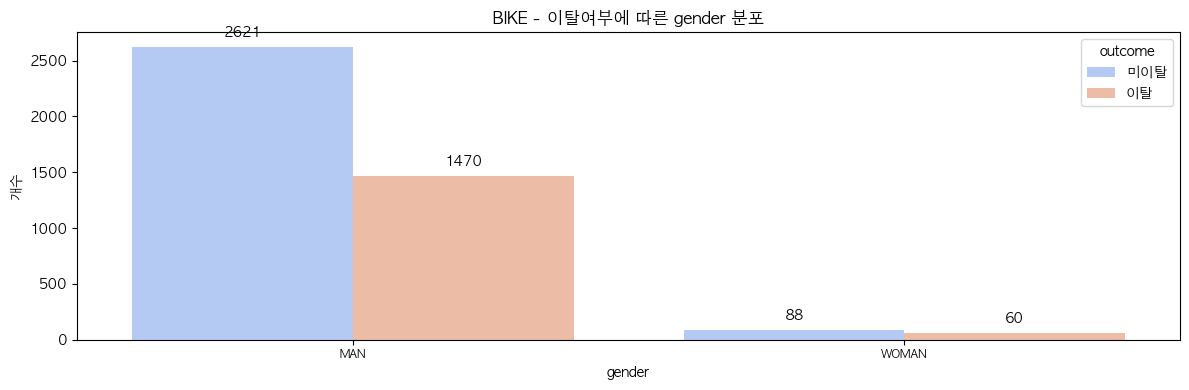

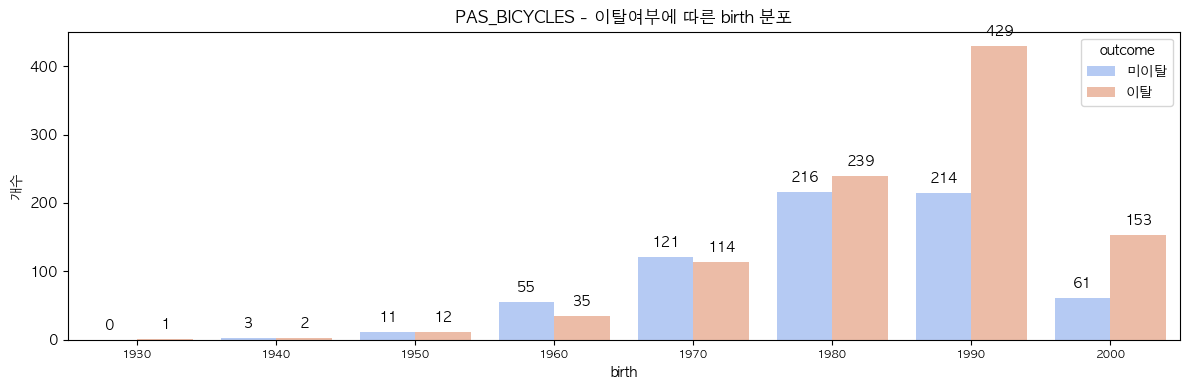

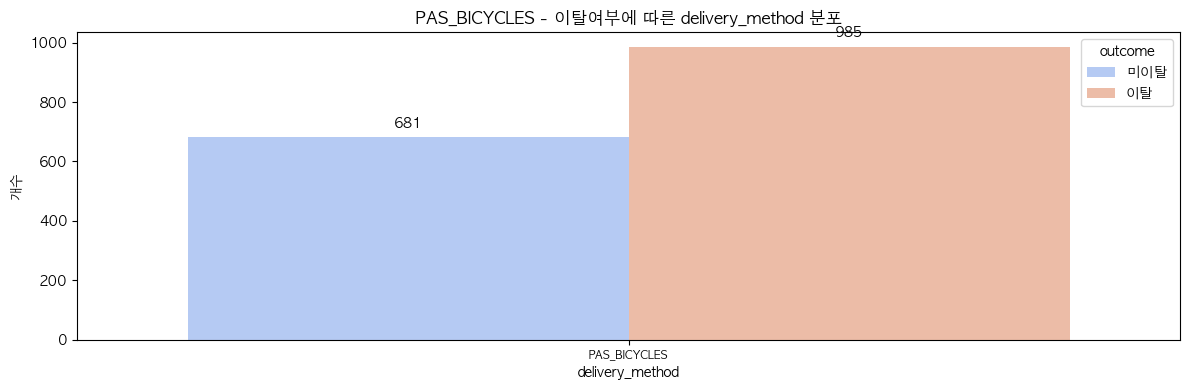

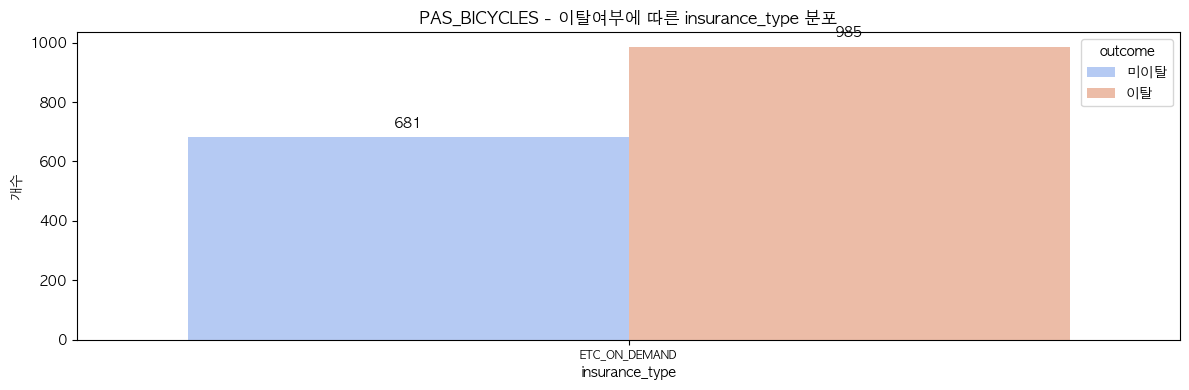

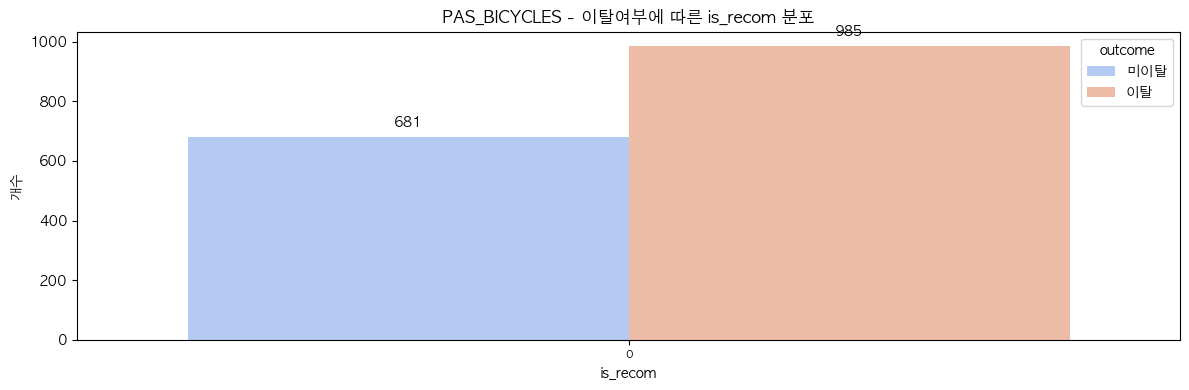

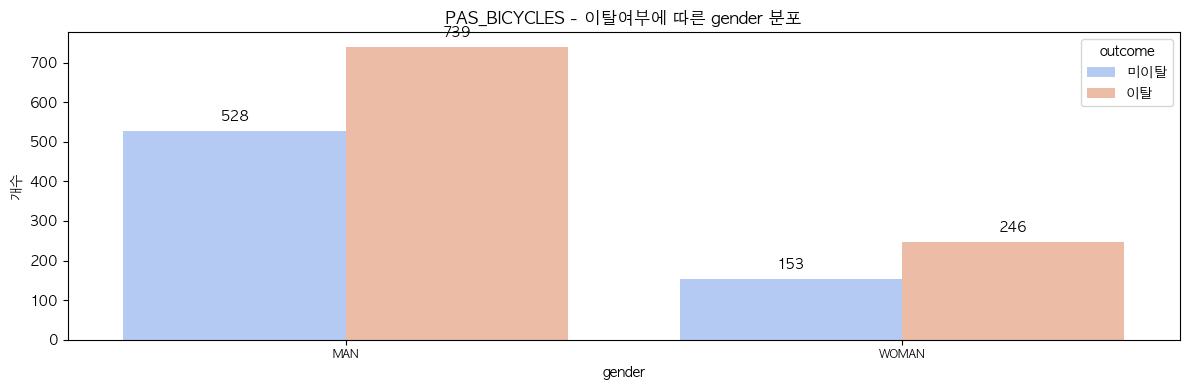

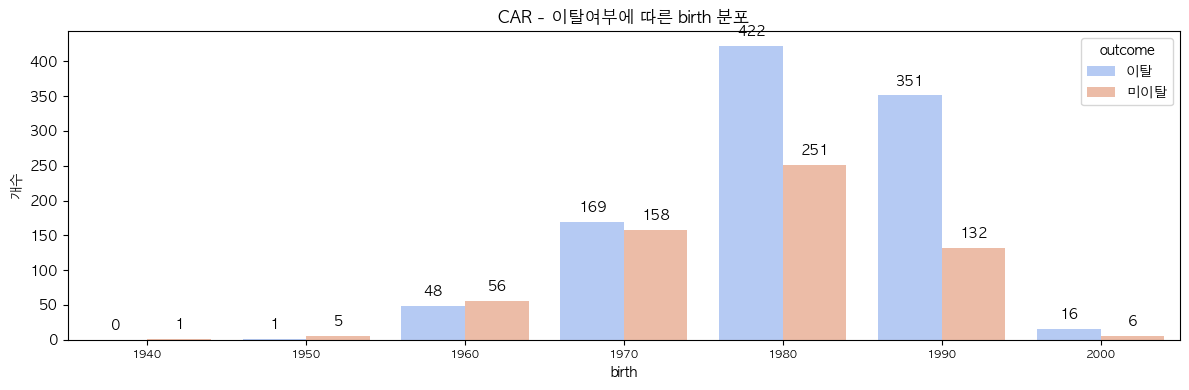

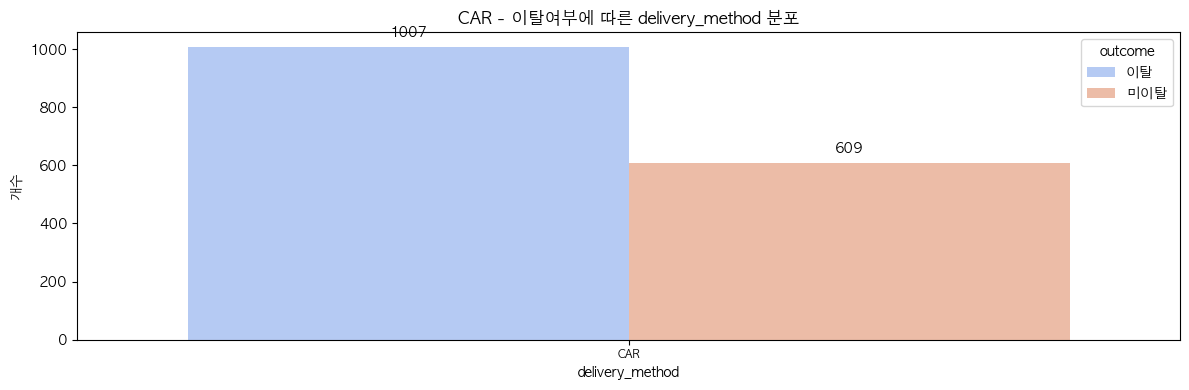

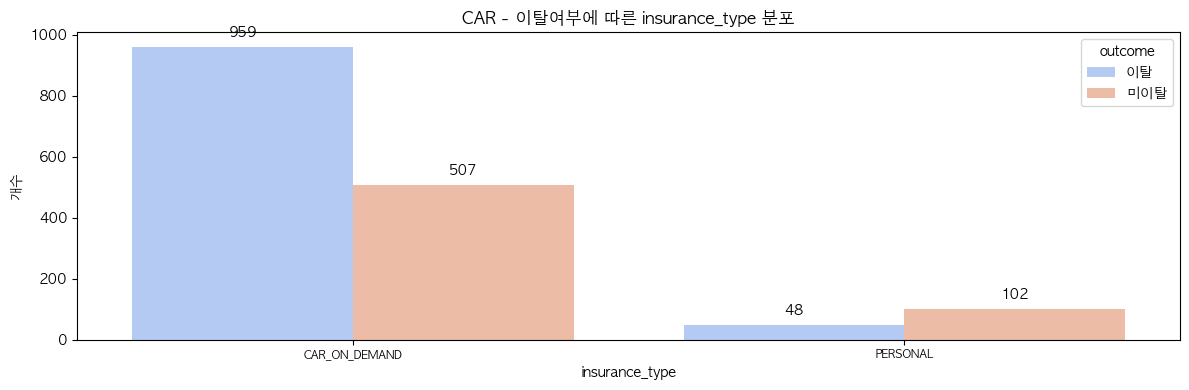

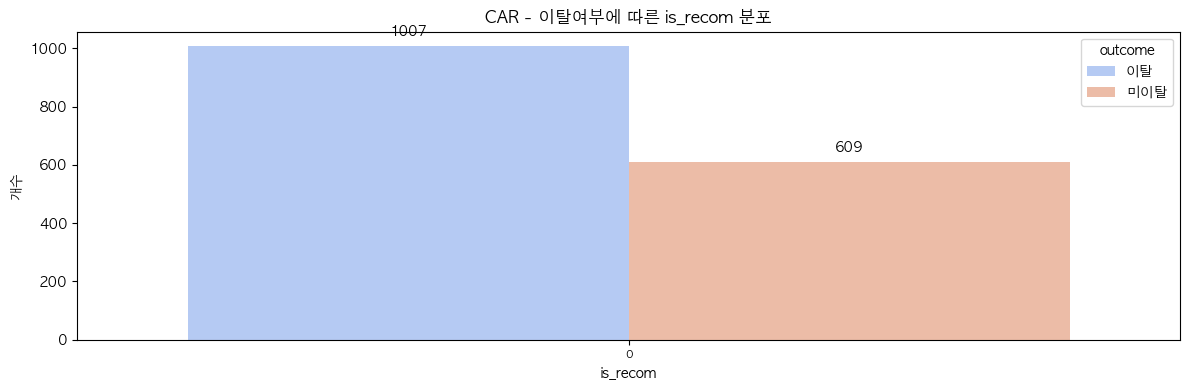

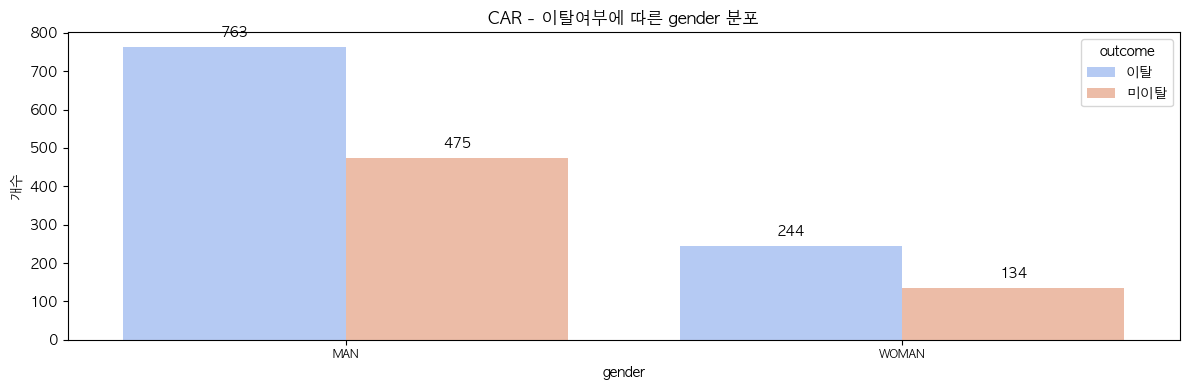

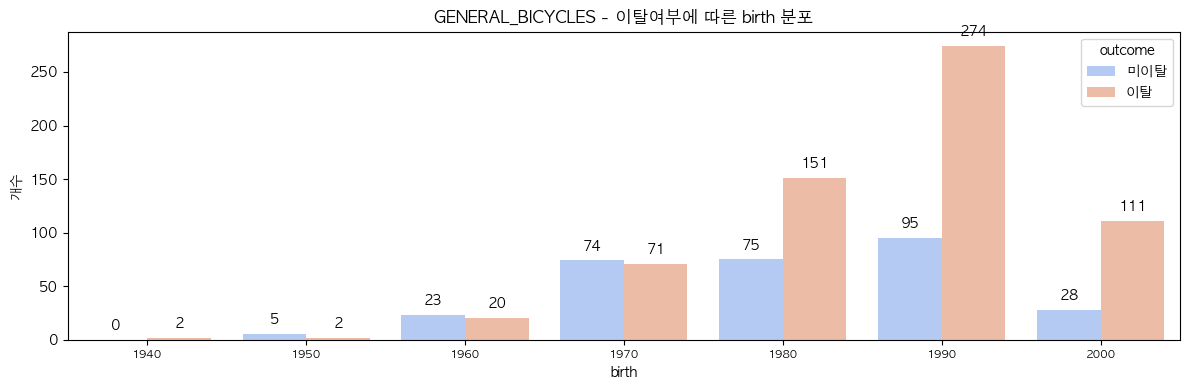

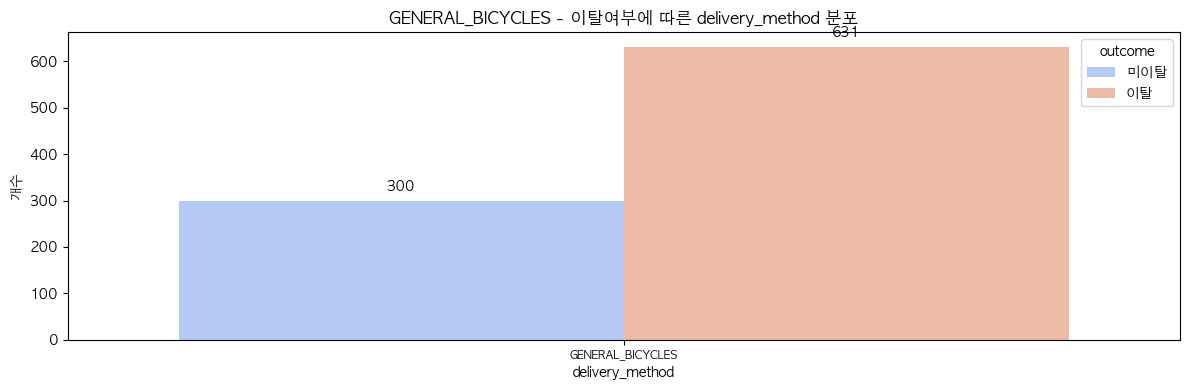

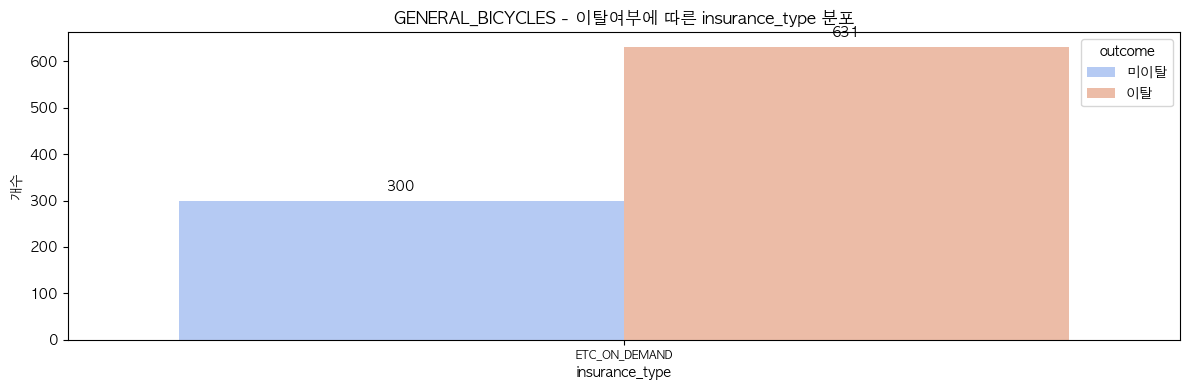

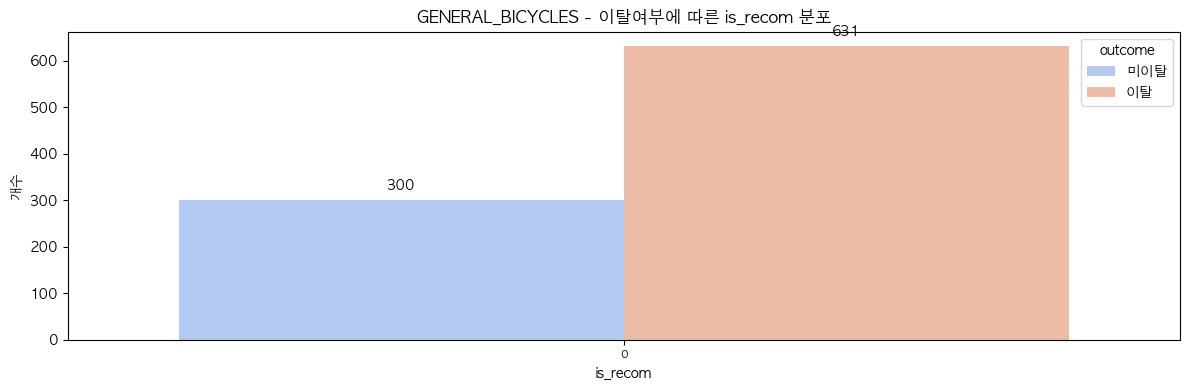

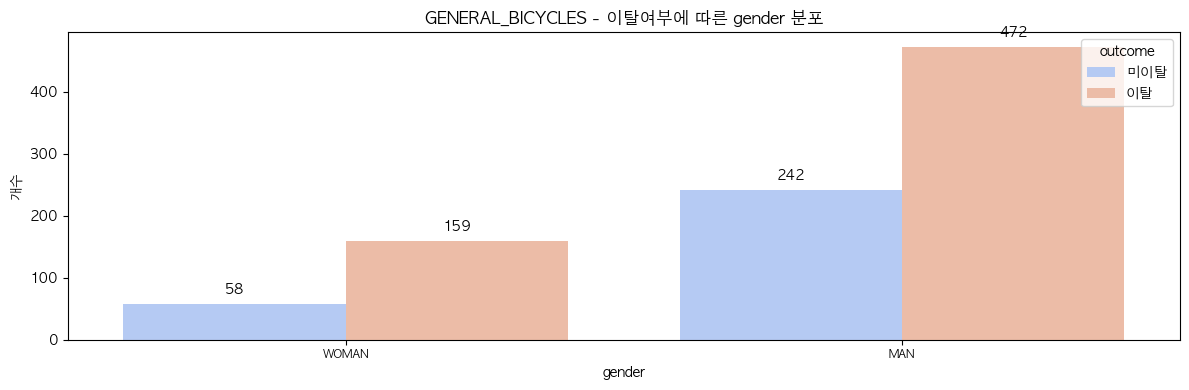

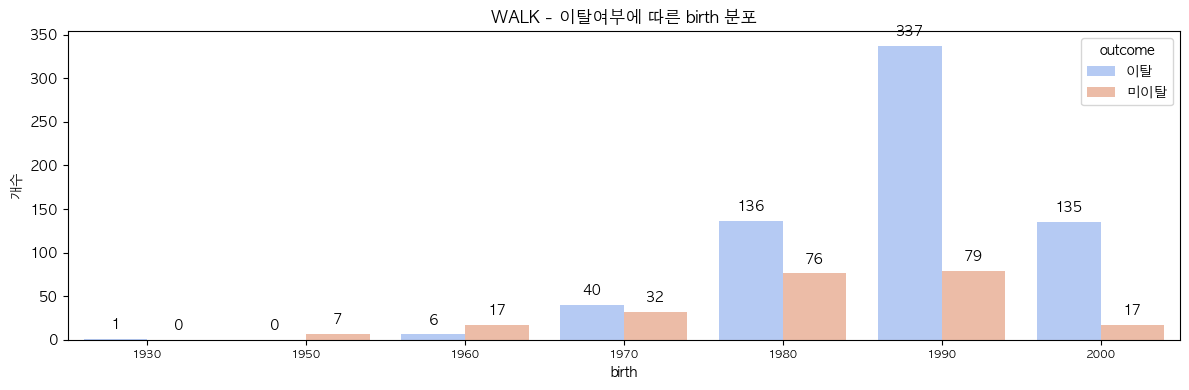

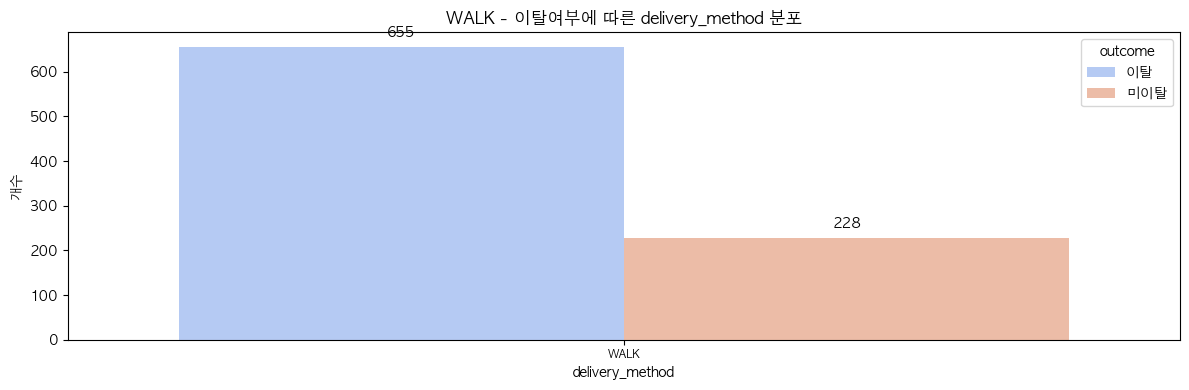

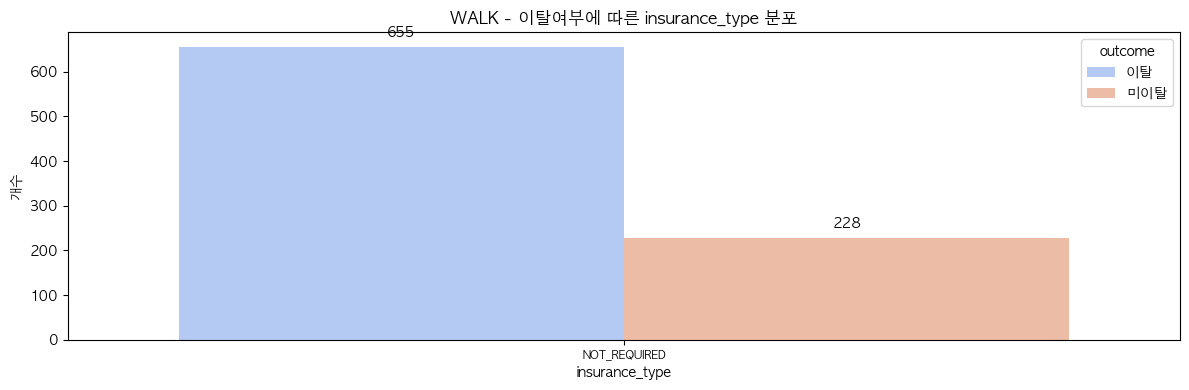

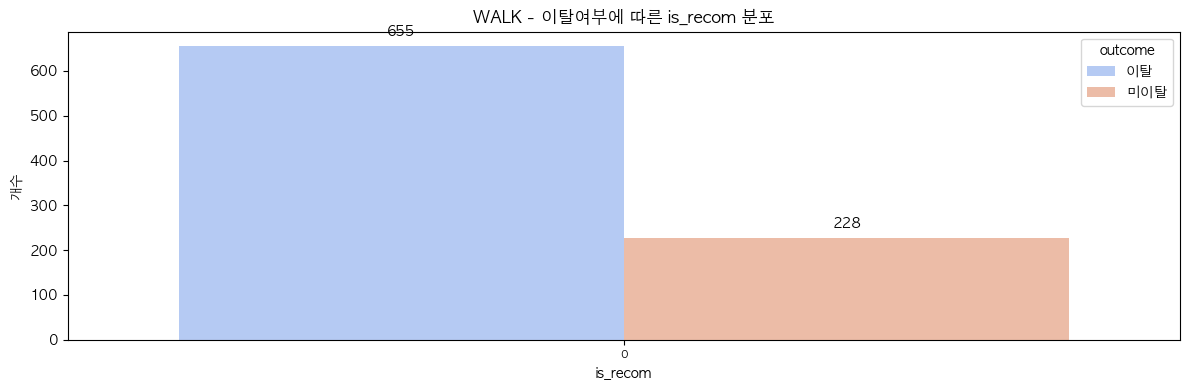

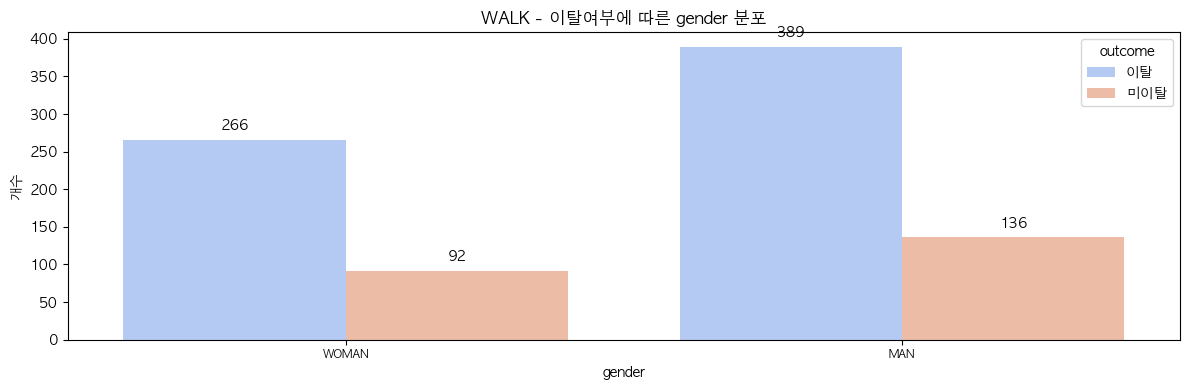

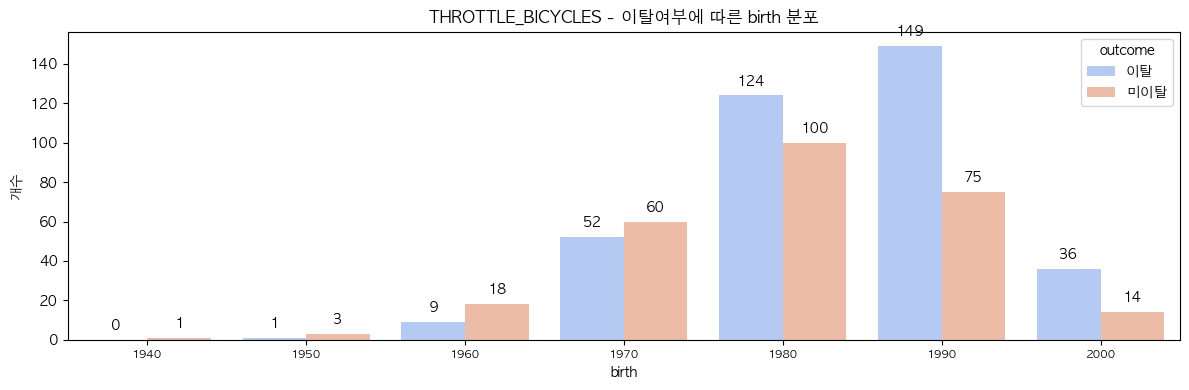

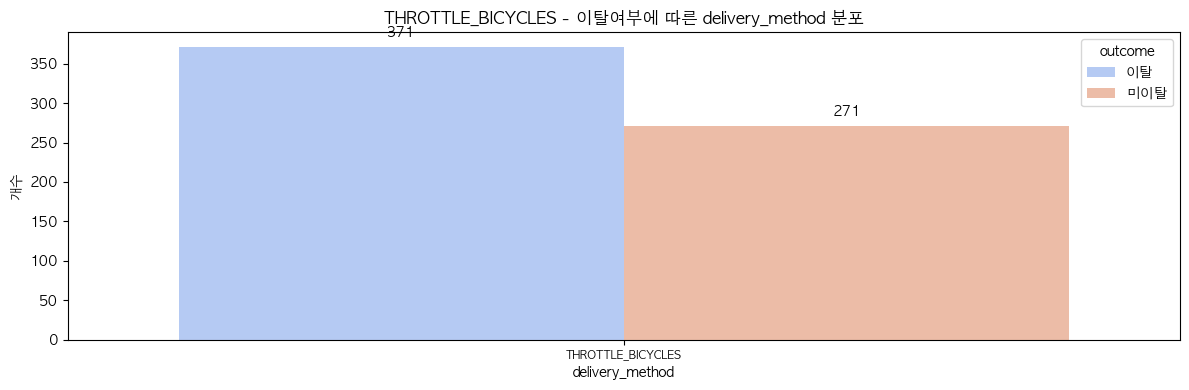

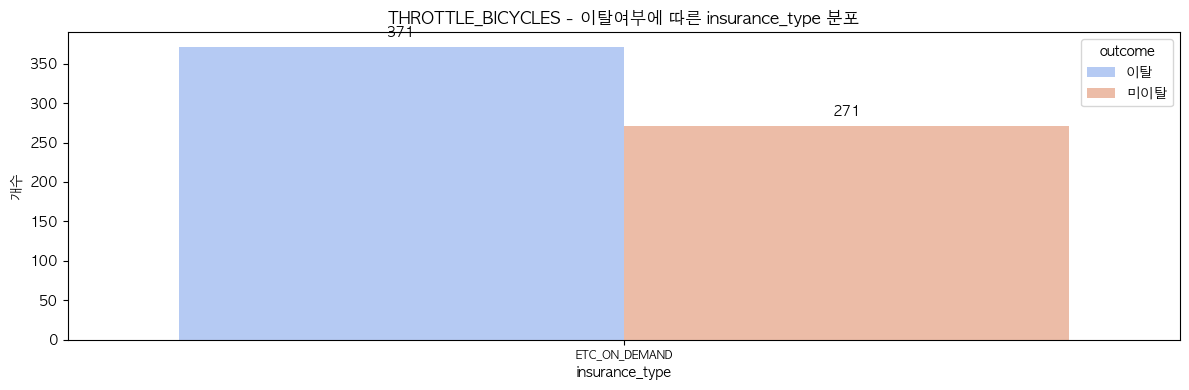

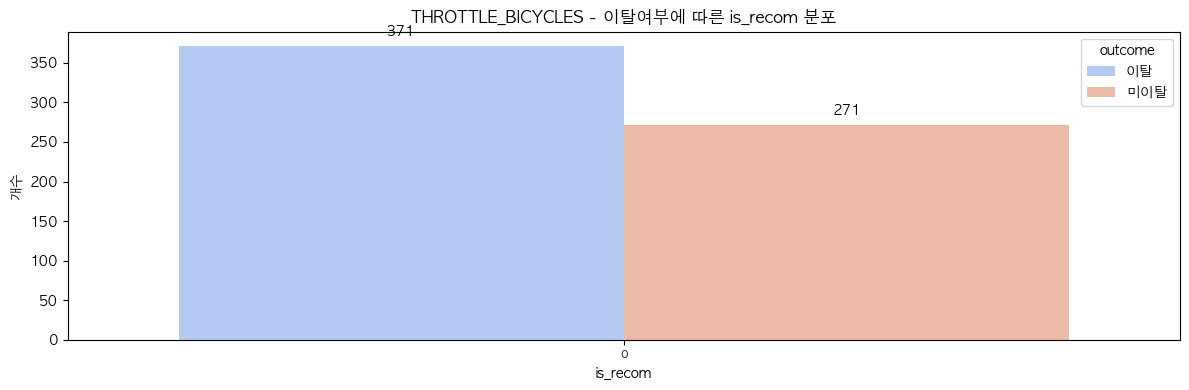

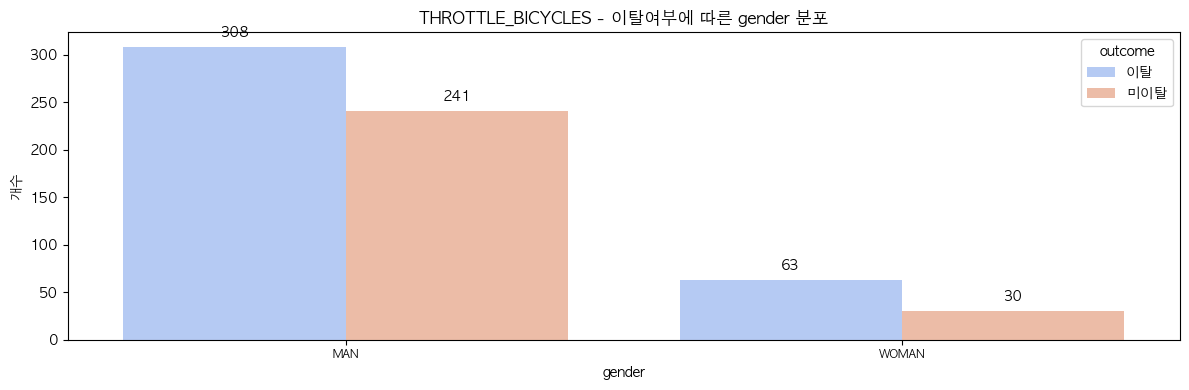

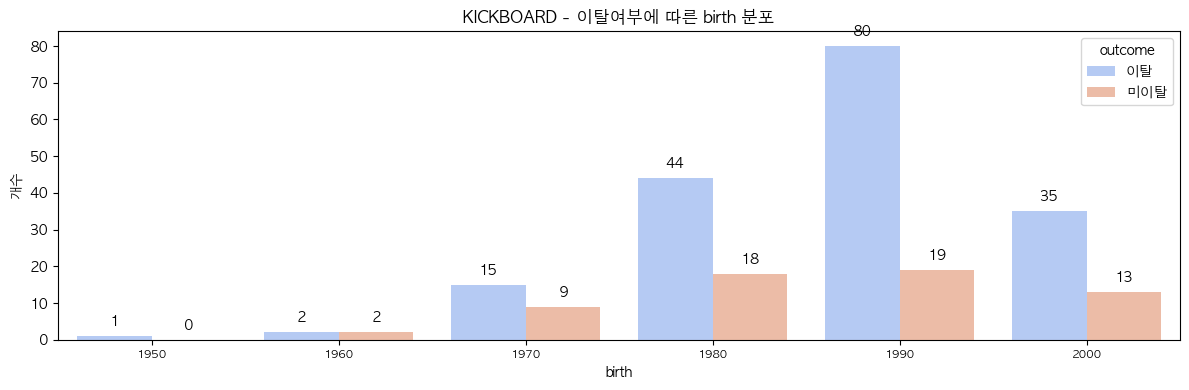

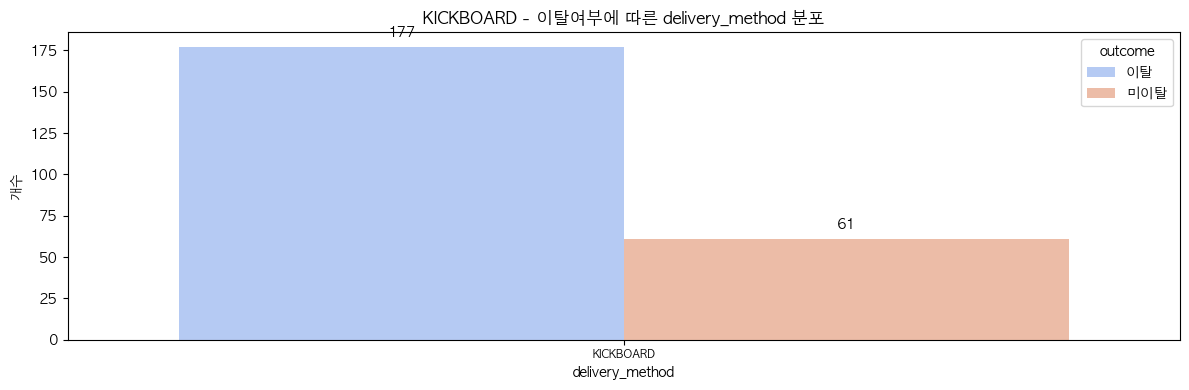

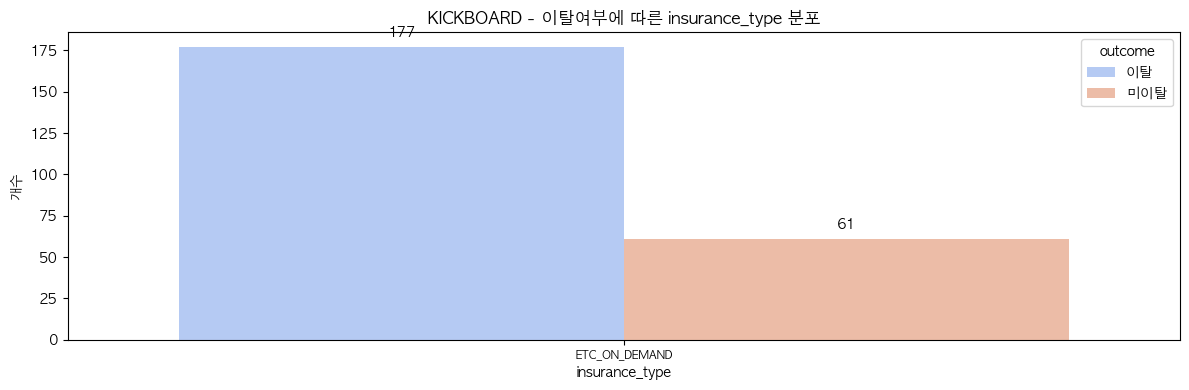

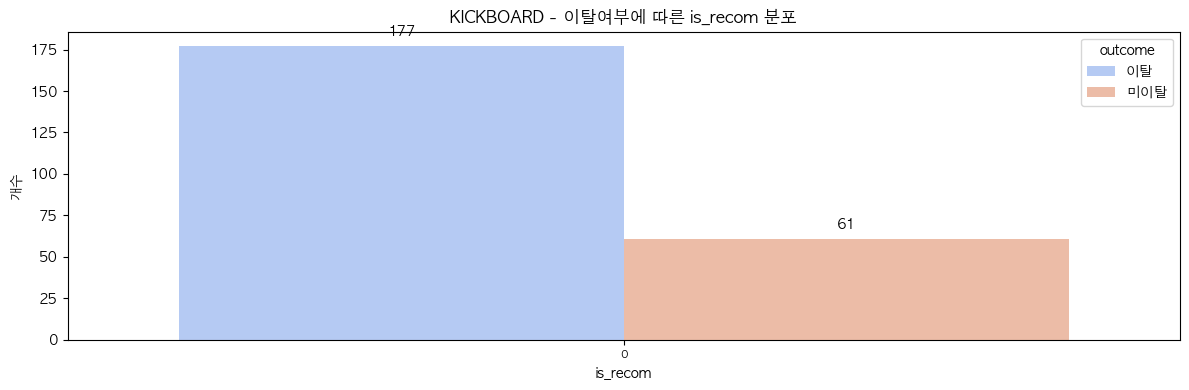

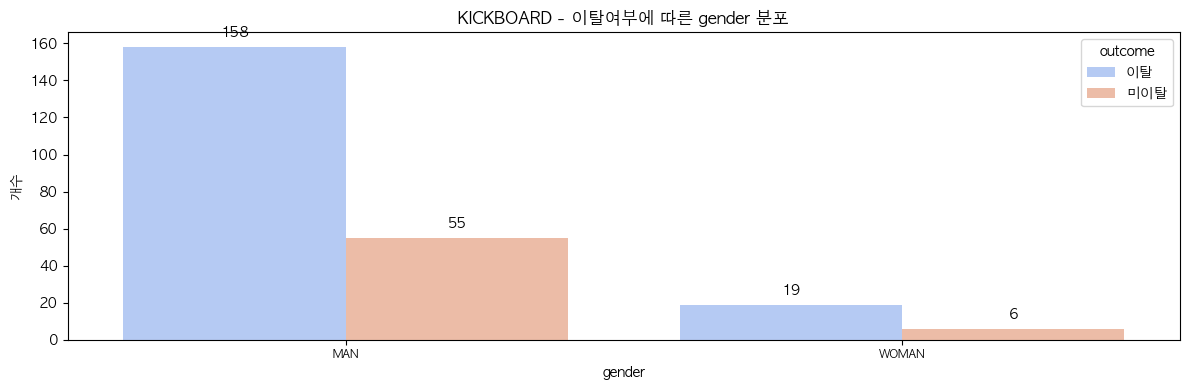

In [102]:
plot_category(data_is_not_recom, category_vars, 'outcome', delivery_method)

In [87]:
data_bike = data_is_not_recom[(data_is_not_recom['delivery_method'] == 'BIKE')]

print(data_bike.shape) # 4,239
print(data_bike['delivery_method'].value_counts()) 

(4239, 20)
delivery_method
BIKE    4239
Name: count, dtype: int64


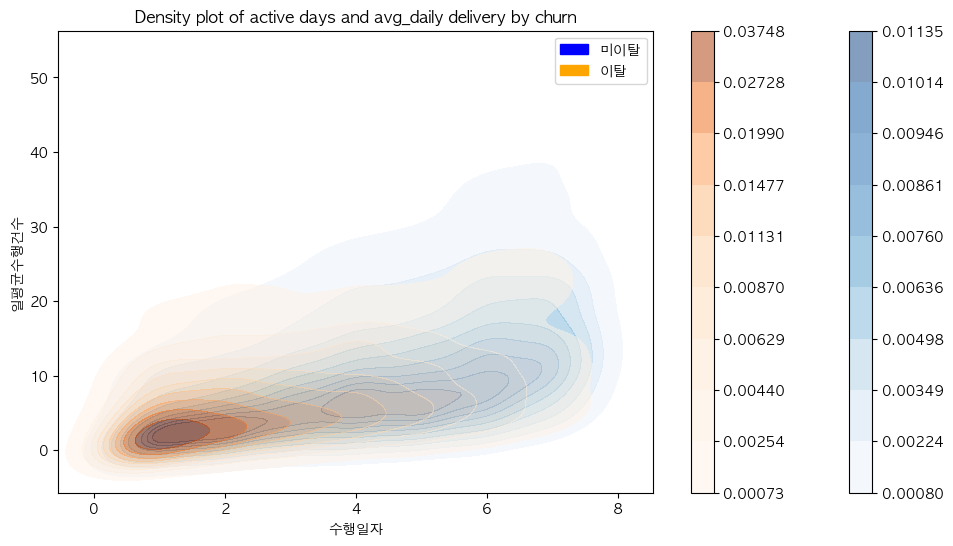

In [88]:
# 이탈 값 되돌리기
mapping  = { '미이탈' : 0 ,  '이탈' : 1}
data_bike['outcome'] = data_bike['outcome'].replace(mapping)

# 데이터 필터링
X_test_0 = data_bike[data_bike['outcome'] == 0]
X_test_1 = data_bike[data_bike['outcome'] == 1]

plt.figure(figsize=(12, 6))

# KDE plot
# `cbar=True`를 추가하여 컬러 바를 그래프에 추가
# `thresh`를 설정하여 밀도가 낮은 영역을 숨기기
sns.kdeplot(data=X_test_0, x='active_days', y='avg_daily_delivery', cmap='Blues', shade=True, alpha=0.5, cbar=True, thresh=0.05)
sns.kdeplot(data=X_test_1, x='active_days', y='avg_daily_delivery', cmap='Oranges', shade=True, alpha=0.5, cbar=True, thresh=0.05)

plt.xlabel('수행일자')
plt.ylabel('일평균수행건수')
plt.title('Density plot of active days and avg_daily delivery by churn')

# Manual legend
blue_patch = mpatches.Patch(color='blue', label='미이탈')
orange_patch = mpatches.Patch(color='orange', label='이탈')
plt.legend(handles=[blue_patch, orange_patch])

# 저장할 디렉토리 생성
#os.makedirs('graphs', exist_ok=True)  

# 그래프를 파일로 저장
#plt.savefig("graphs_bike/density_plot.png")

# 그래프 표시
plt.show()

In [89]:
mapping  = { '미이탈' : 0 ,  '이탈' : 1}
data_bike['outcome'] = data_bike['outcome'].replace(mapping)

# outlier 제거  - outcome 별로 나눠서 
def remove_outliers(df, column):
    Q1 = df.groupby('outcome')[column].quantile(0.25)
    Q3 = df.groupby('outcome')[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[df.apply(lambda x: (x[column] >= lower_bound[x['outcome']]) & 
                                 (x[column] <= upper_bound[x['outcome']]), axis=1)]

In [90]:
#'avg_cnt'와 'day_cnt'에 대한 아웃라이어 제거
# data_filtered_avg = remove_outliers(data_bike, 'active_days')
# data_filtered_both = remove_outliers(data_bike, 'avg_daily_delivery')

# print(data_filtered_both.shape)  
# print(data_filtered_both['outcome'].value_counts())

#data_filtered_both.to_excel('data_filtered_both.xlsx', index=False, engine='openpyxl') # 3,393 / 2,255, 1,138 -> 1,782/ 1203, 579

In [91]:
# train_set, test_set = train_test_split(data_filtered_both, test_size=0.25, 
#                                        stratify=data_filtered_both['outcome'], random_state=1234)

# le_delivery_method = LabelEncoder()
# le_insurance_type = LabelEncoder()
# le_gender = LabelEncoder()

# data_filtered_both['delivery_method_encoded'] = le_delivery_method.fit_transform(data_filtered_both['delivery_method'])
# data_filtered_both['insurance_type_encoded'] = le_insurance_type.fit_transform(data_filtered_both['insurance_type'])
# data_filtered_both['gender_encoded'] = le_gender.fit_transform(data_filtered_both['gender'])

# train_set['delivery_method_encoded'] = data_filtered_both.loc[train_set.index, 'delivery_method_encoded']
# train_set['insurance_type_encoded'] = data_filtered_both.loc[train_set.index, 'insurance_type_encoded']
# train_set['gender_encoded'] = data_filtered_both.loc[train_set.index, 'gender_encoded']

# test_set['delivery_method_encoded'] = data_filtered_both.loc[test_set.index, 'delivery_method_encoded']
# test_set['insurance_type_encoded'] = data_filtered_both.loc[test_set.index, 'insurance_type_encoded']
# test_set['gender_encoded'] = data_filtered_both.loc[test_set.index, 'gender_encoded']


# train_set.drop(['delivery_method', 'insurance_type', 'gender'], axis=1, inplace=True)
# test_set.drop(['delivery_method', 'insurance_type', 'gender'], axis=1, inplace=True)


# X_train = train_set[['birth', 'delivery_method_encoded', 'insurance_type_encoded', 'is_recom', 'gender_encoded',
#                      'active_days', 'avg_daily_delivery', 'avg_distance', 'avg_fee', 
#                      'avg_distance_1_to_3', 'avg_fee_1_to_3', 'join_period', 
#                      'from_join_to_first_able', 'from_first_able_to_start']]

# y_train = train_set['outcome']

# X_test = test_set[['birth', 'delivery_method_encoded', 'insurance_type_encoded', 'is_recom', 'gender_encoded',
#                    'active_days', 'avg_daily_delivery', 'avg_distance', 'avg_fee', 
#                    'avg_distance_1_to_3', 'avg_fee_1_to_3', 'join_period', 
#                    'from_join_to_first_able', 'from_first_able_to_start']]

# y_test = test_set['outcome']


# delivery_method_mapping = dict(zip(le_delivery_method.classes_, le_delivery_method.transform(le_delivery_method.classes_)))
# insurance_type_mapping = dict(zip(le_insurance_type.classes_, le_insurance_type.transform(le_insurance_type.classes_)))
# gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))

# print("delivery_method:", delivery_method_mapping)
# print("insurance_type:", insurance_type_mapping)
# print("gender:", gender_mapping)

In [92]:
data_filtered_both = data_bike
train_set, test_set = train_test_split(data_filtered_both, test_size = 0.25, 
                                       stratify = data_filtered_both['outcome'], random_state=1234)
X_train = train_set[['active_days', 'avg_daily_delivery']]
X_test =  test_set[['active_days', 'avg_daily_delivery']]
y_test = test_set['outcome']
y_train = train_set['outcome']

print(X_train.shape, X_test.shape)  
print(y_train.value_counts())
print(y_test.value_counts())

(3179, 2) (1060, 2)
outcome
0    2032
1    1147
Name: count, dtype: int64
outcome
0    677
1    383
Name: count, dtype: int64


Optimal max_depth is 3
Training Accuracy: 0.6961
Test Accuracy: 0.7094


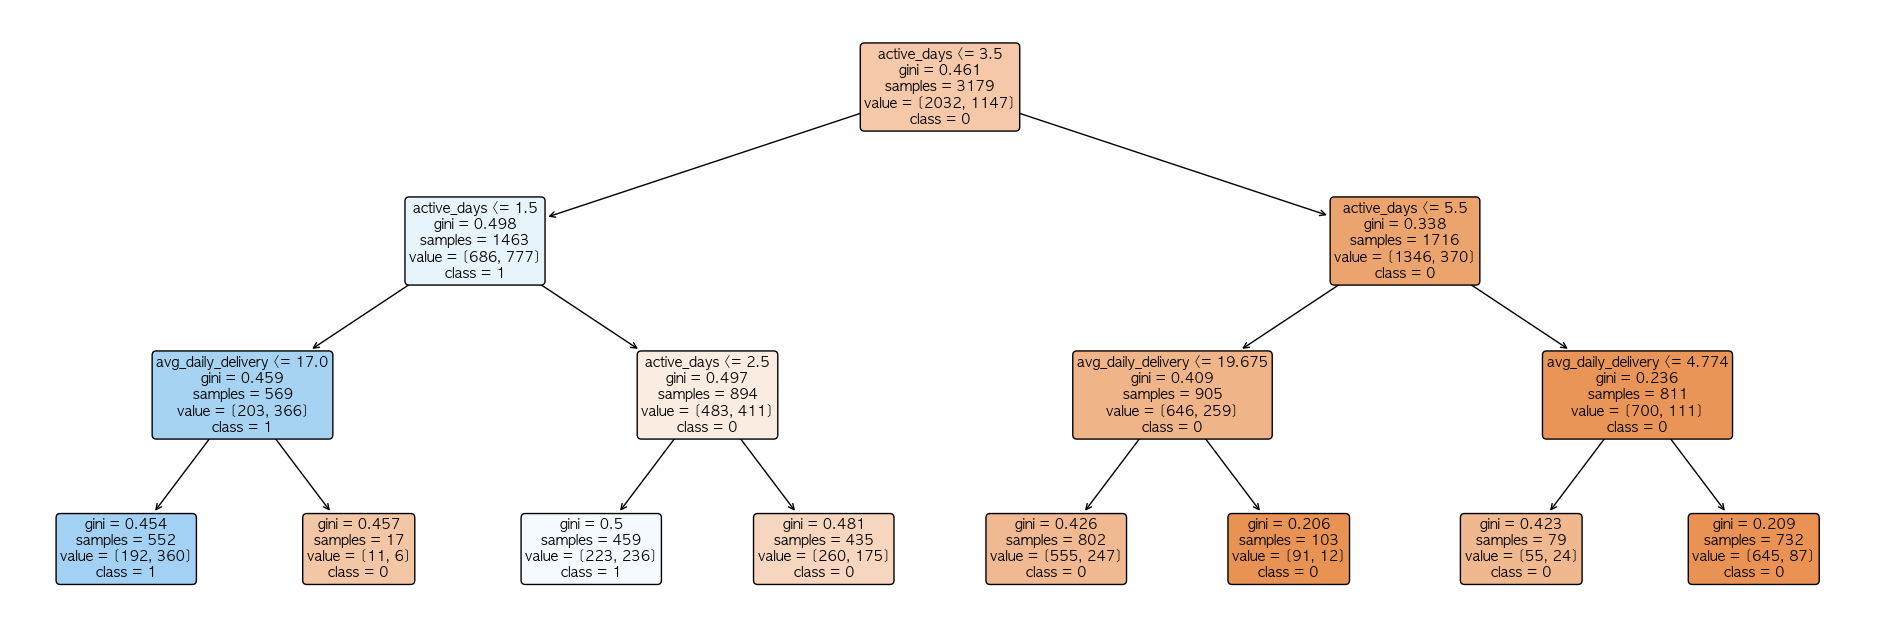

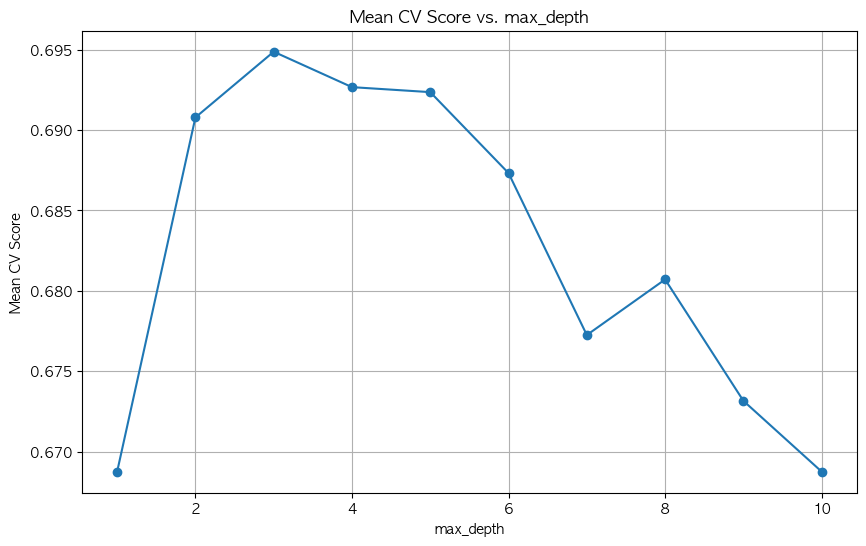

In [93]:
depth_range = list(range(1, 11))  # 1부터 10까지의 깊이를 테스트
cv_scores = []
random.seed(2234)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train, y_train, cv=10)  # 5-fold 교차 검증
    cv_scores.append(scores.mean())

# 교차 검증 점수가 가장 높은 max_depth 값 찾기
optimal_depth = depth_range[cv_scores.index(max(cv_scores))]
print(f"Optimal max_depth is {optimal_depth}")

# 최적의 max_depth 값으로 모델 학습
clf = DecisionTreeClassifier(max_depth=optimal_depth)
clf = clf.fit(X_train, y_train)

# 모델의 정확도 확인
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")

feature_names = [col.replace('_encoded', '') for col in X_train.columns]

# Decision Tree 시각화
fig, ax = plt.subplots(figsize=(24, 8))
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=['0', '1'], rounded=True, fontsize=10)
#plt.savefig("graphs_bike/dt tree 1.png")
plt.show()

# 교차 검증 점수에 따른 max_depth 값의 변화를 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.plot(depth_range, cv_scores, marker='o', linestyle='-')
plt.xlabel("max_depth")
plt.ylabel("Mean CV Score")
plt.title("Mean CV Score vs. max_depth")
plt.grid(True)
#plt.savefig("graphs_bike/cv_dt tree.png")
plt.show()